In [24]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from haversine import haversine, Unit
from sklearn.metrics.pairwise import haversine_distances
from tqdm import tqdm
from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm
import pandas as pd
from xhistogram.xarray import histogram
from sklearn.neighbors import KNeighborsRegressor, BallTree
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

def haversine_sklearn(lat1, lon1, lat_array, lon_array):


    X = np.array([lat1, lon1]).reshape(1, -1)
    Y = np.array([lat_array, lon_array]).T
    X = np.radians(X)
    Y = np.radians(Y)

    return haversine_distances(X, Y) * 6357
from matplotlib.colors import BoundaryNorm

colors = np.array([[0.10588235, 0.61960784, 0.46666667, 1.],
                [0.45882353, 0.43921569, 0.70196078, 1.],
                [0.4       , 0.4       , 0.4       , 1.],
                [0.90196078, 0.67058824, 0.00784314, 1.],
])

cmap = ListedColormap(colors)
#cmap = plt.get_cmap('Dark2')
bounds = [1, 2, 3, 4, 5]
norm = BoundaryNorm(bounds, cmap.N)
# Create a figure and axis with the specified size

SIC = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_unified_data/amsr_modis_sic.nc').sortby('time')


fontsize = 8

plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.labelsize']  = fontsize
plt.rcParams['axes.titlesize']  = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams['legend.title_fontsize'] = fontsize
plt.rcParams['figure.titlesize'] = fontsize
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.axisbelow'] = True
sc_cmap = 'Dark2'


cmap = ListedColormap(colors)


In [25]:
SIC

<xarray.Dataset> Size: 233MB
Dimensions:  (x: 3662, y: 1221, time: 13)
Coordinates:
  * x        (x) float64 29kB -29.99 -29.96 -29.94 -29.91 ... 59.95 59.97 60.0
  * y        (y) float64 10kB 89.99 89.96 89.94 89.91 ... 60.08 60.05 60.03 60.0
  * time     (time) datetime64[ns] 104B 2022-03-14 2022-03-16 ... 2022-04-11
Data variables:
    z        (time, y, x) float32 233MB ...

In [26]:
outfiles_keys = [f.split('_full')[0] for f in os.listdir(f'/projekt_agmwend/home_rad/Joshua/Mueller_et_al_2024/data/full_datasets/') if 'full' in f and 'T' in f]

outfiles_keys.sort()

outfiles = os.listdir('/projekt_agmwend/home_rad/Joshua/Mueller_et_al_2024/data/full_datasets/')
outfiles = [f'/projekt_agmwend/home_rad/Joshua/Mueller_et_al_2024/data/full_datasets/{f}' for f in outfiles if 'full' in f and 'T' in f]
outfiles.sort() 

segmentation_path = '/projekt_agmwend/home_rad/Joshua/Mueller_et_al_2024/data/segmented_data_nadir/'
segmentation_files = [os.path.join(segmentation_path, f) for f in os.listdir(segmentation_path)]
segmentation_files.sort()

### compare the length
len_outfiles = len(outfiles)
len_segmentation_files = len(segmentation_files)

if len_outfiles != len_segmentation_files:
    print('The length of the outfiles and the segmentation files does not match')
    print(f'len_outfiles: {len_outfiles}')
    print(f'len_segmentation_files: {len_segmentation_files}')


df_files = pd.DataFrame(columns=['outfile', 'segfile', 'key'])
outfiles_df = []
segfiles_df = []
keys_df = []

for i in range(min([len_outfiles, len_segmentation_files])):
    key = outfiles_keys[i]
    outfile = outfiles[i]
    segfile = [f for f in segmentation_files if key in f][0]
    # print(f'Working on {key}')
    # print(f'Outfile: {outfile}')
    # print(f'Segfile: {segfile}')

    outfiles_df.append(outfile)
    segfiles_df.append(segfile)
    keys_df.append(key)

df_files['outfile'] = outfiles_df
df_files['segfile'] = segfiles_df
df_files['key'] = keys_df

df_files

outfile  \
0   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
1   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
2   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
3   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
4   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
5   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
6   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
7   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
8   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
9   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
10  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
11  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
12  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
13  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   

                                              segfile  \
0   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
1   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
2   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
3   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
4   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
5   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
6   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
7   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
8   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
9   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
10  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
11  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
12  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
13  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   

                                        key  
0   2022-03-21T11:39:00_2022-03-21T11:44:00  
1   2022-03-28T10:28:00_2022-03-28T11:05:00  
2   2022-03-28T13:13:30_2022-03-28T13:21:30  
3   2022-03-28T14:12:30_2022-03-28T14:27:00  
4   2022-03-29T14:27:00_2022-03-29T14:37:30  
5   2022-03-30T09:46:30_2022-03-30T09:52:00  
6   2022-04-01T09:25:00_2022-04-01T09:32:30  
7   2022-04-01T11:22:30_2022-04-01T11:43:30  
8   2022-04-01T12:20:00_2022-04-01T12:51:00  
9   2022-04-01T13:36:00_2022-04-01T13:52:30  
10  2022-04-04T09:18:30_2022-04-04T09:23:30  
11  2022-04-04T12:24:00_2022-04-04T13:01:00  
12  2022-04-04T13:19:30_2022-04-04T13:40:00  
13  2022-04-04T14:08:00_2022-04-04T14:30:00

In [27]:
df_files.to_csv('../../../data/final_filelist_to_submission.csv', index=False)

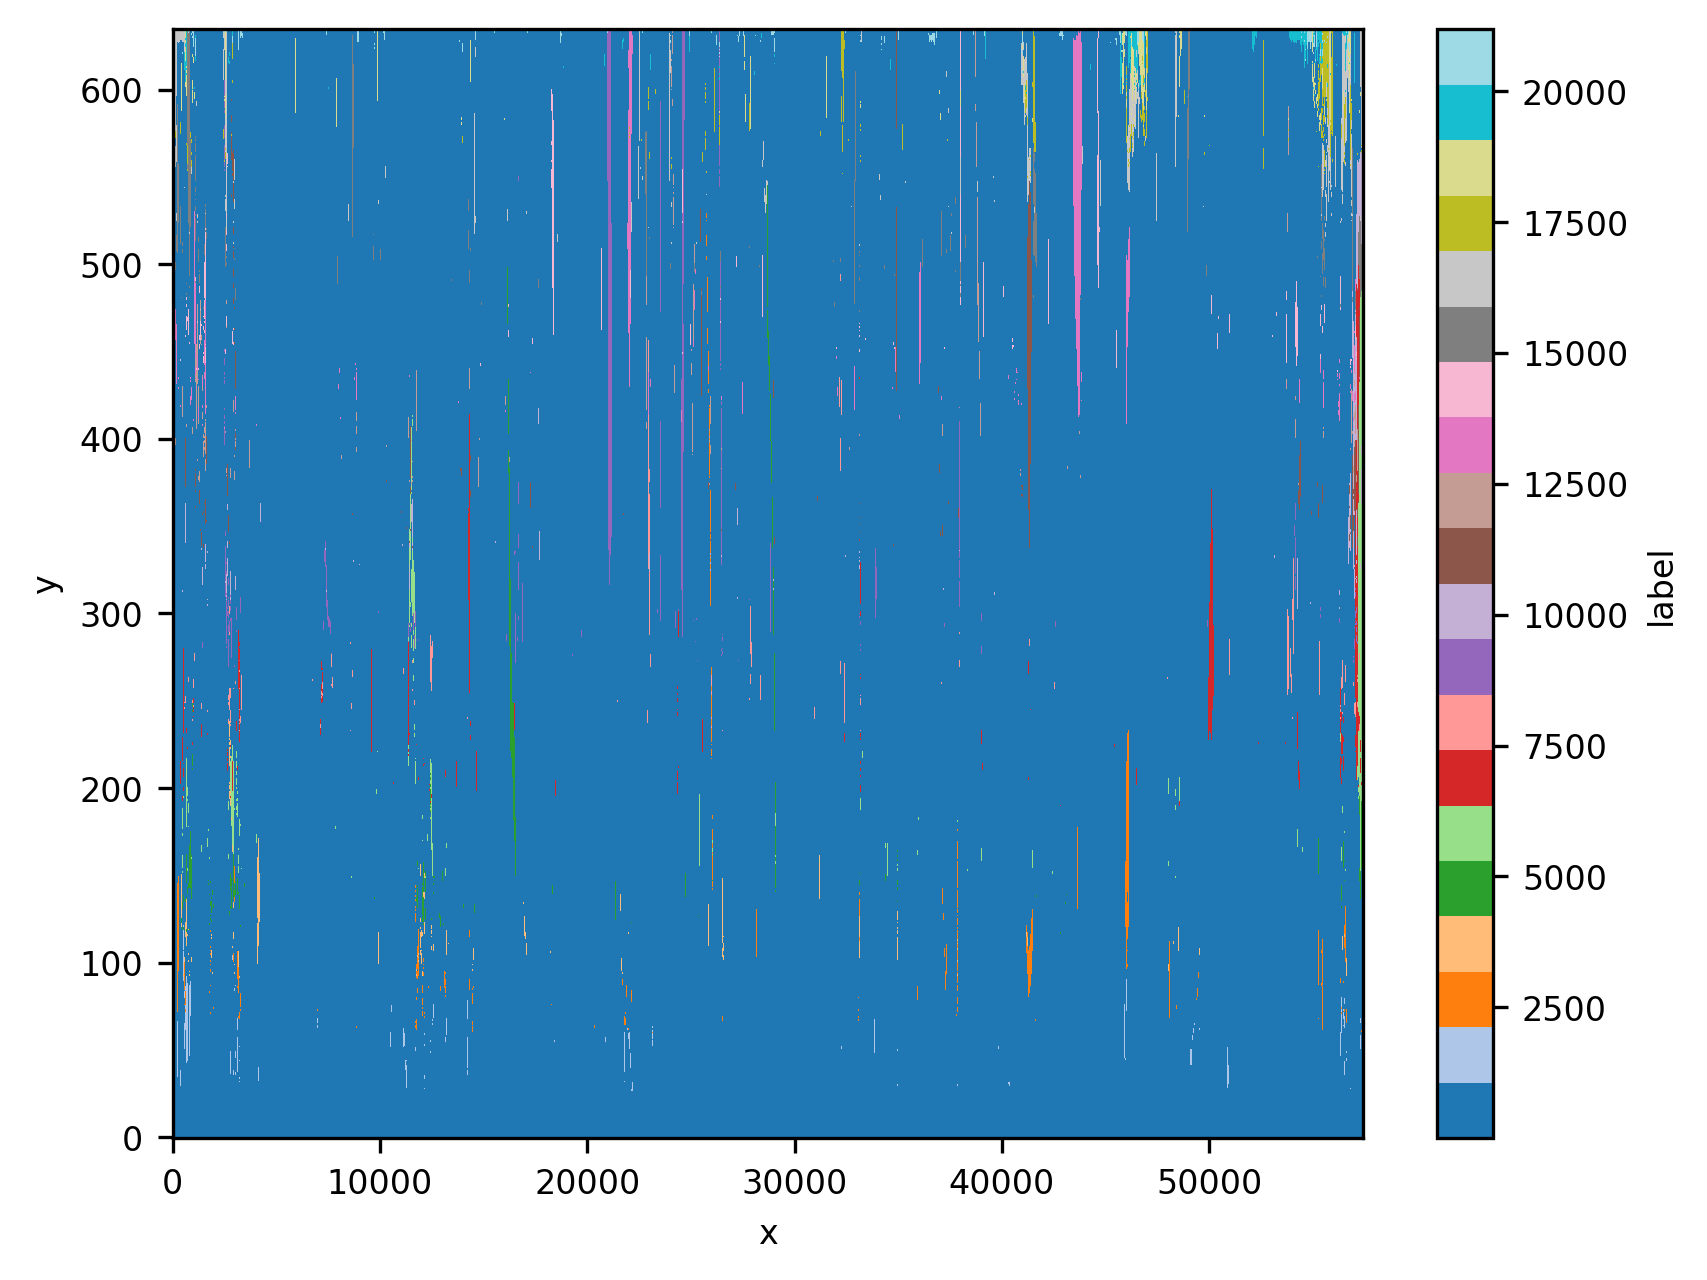

In [28]:
xr.open_dataset(df_files['outfile'][1])['label'].plot(cmap='tab20')

In [29]:
df_files

outfile  \
0   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
1   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
2   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
3   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
4   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
5   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
6   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
7   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
8   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
9   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
10  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
11  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
12  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
13  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   

                                              segfile  \
0   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
1   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
2   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
3   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
4   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
5   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
6   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
7   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
8   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
9   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
10  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
11  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
12  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
13  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   

                                        key  
0   2022-03-21T11:39:00_2022-03-21T11:44:00  
1   2022-03-28T10:28:00_2022-03-28T11:05:00  
2   2022-03-28T13:13:30_2022-03-28T13:21:30  
3   2022-03-28T14:12:30_2022-03-28T14:27:00  
4   2022-03-29T14:27:00_2022-03-29T14:37:30  
5   2022-03-30T09:46:30_2022-03-30T09:52:00  
6   2022-04-01T09:25:00_2022-04-01T09:32:30  
7   2022-04-01T11:22:30_2022-04-01T11:43:30  
8   2022-04-01T12:20:00_2022-04-01T12:51:00  
9   2022-04-01T13:36:00_2022-04-01T13:52:30  
10  2022-04-04T09:18:30_2022-04-04T09:23:30  
11  2022-04-04T12:24:00_2022-04-04T13:01:00  
12  2022-04-04T13:19:30_2022-04-04T13:40:00  
13  2022-04-04T14:08:00_2022-04-04T14:30:00

In [30]:
outfiles_keys = [f.split('_full')[0] for f in os.listdir(f'../../../data/cluster/output_sam/') if 'full' in f and 'T' in f]

outfiles_keys.sort()

outfiles = os.listdir('../../../data/cluster/output_sam')
outfiles = [f'../../../data/cluster/output_sam/{f}' for f in outfiles if 'full' in f and 'T' in f]
outfiles.sort() 

segmentation_path = '/projekt_agmwend/home_rad/Joshua/Mueller_et_al_2024/data/segmented_data/'
segmentation_files = [os.path.join(segmentation_path, f) for f in os.listdir(segmentation_path)]
segmentation_files.sort()

### compare the length
len_outfiles = len(outfiles)
len_segmentation_files = len(segmentation_files)

if len_outfiles != len_segmentation_files:
    print('The length of the outfiles and the segmentation files does not match')
    print(f'len_outfiles: {len_outfiles}')
    print(f'len_segmentation_files: {len_segmentation_files}')


df_files = pd.DataFrame(columns=['outfile', 'segfile', 'key'])
outfiles_df = []
segfiles_df = []
keys_df = []

for i in range(min([len_outfiles, len_segmentation_files])):
    key = outfiles_keys[i]
    outfile = outfiles[i]
    segfile = [f for f in segmentation_files if key in f][0]
    # print(f'Working on {key}')
    # print(f'Outfile: {outfile}')
    # print(f'Segfile: {segfile}')

    outfiles_df.append(outfile)
    segfiles_df.append(segfile)
    keys_df.append(key)

df_files['outfile'] = outfiles_df
df_files['segfile'] = segfiles_df
df_files['key'] = keys_df

df_files


The length of the outfiles and the segmentation files does not match
len_outfiles: 16
len_segmentation_files: 17


outfile  \
0   ../../../data/cluster/output_sam/2022-03-20T10...   
1   ../../../data/cluster/output_sam/2022-03-21T11...   
2   ../../../data/cluster/output_sam/2022-03-28T10...   
3   ../../../data/cluster/output_sam/2022-03-28T13...   
4   ../../../data/cluster/output_sam/2022-03-28T14...   
5   ../../../data/cluster/output_sam/2022-03-29T14...   
6   ../../../data/cluster/output_sam/2022-03-30T09...   
7   ../../../data/cluster/output_sam/2022-04-01T09...   
8   ../../../data/cluster/output_sam/2022-04-01T10...   
9   ../../../data/cluster/output_sam/2022-04-01T11...   
10  ../../../data/cluster/output_sam/2022-04-01T12...   
11  ../../../data/cluster/output_sam/2022-04-01T13...   
12  ../../../data/cluster/output_sam/2022-04-04T09...   
13  ../../../data/cluster/output_sam/2022-04-04T12...   
14  ../../../data/cluster/output_sam/2022-04-04T13...   
15  ../../../data/cluster/output_sam/2022-04-04T14...   

                                              segfile  \
0   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
1   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
2   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
3   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
4   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
5   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
6   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
7   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
8   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
9   /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
10  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
11  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
12  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
13  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
14  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   
15  /projekt_agmwend/home_rad/Joshua/Mueller_et_al...   

                                        key  
0   2022-03-20T10:35:00_2022-03-20T10:50:00  
1   2022-03-21T11:39:00_2022-03-21T11:44:00  
2   2022-03-28T10:28:00_2022-03-28T11:05:00  
3   2022-03-28T13:13:30_2022-03-28T13:21:30  
4   2022-03-28T14:12:30_2022-03-28T14:27:00  
5   2022-03-29T14:27:00_2022-03-29T14:37:30  
6   2022-03-30T09:46:30_2022-03-30T09:52:00  
7   2022-04-01T09:25:00_2022-04-01T09:32:30  
8   2022-04-01T10:21:00_2022-04-01T10:54:00  
9   2022-04-01T11:22:30_2022-04-01T11:43:30  
10  2022-04-01T12:20:00_2022-04-01T12:51:00  
11  2022-04-01T13:36:00_2022-04-01T13:52:30  
12  2022-04-04T09:18:30_2022-04-04T09:23:30  
13  2022-04-04T12:24:00_2022-04-04T13:01:00  
14  2022-04-04T13:19:30_2022-04-04T13:40:00  
15  2022-04-04T14:08:00_2022-04-04T14:30:00

In [31]:
df_files.iloc[0]

outfile    ../../../data/cluster/output_sam/2022-03-20T10...
segfile    /projekt_agmwend/home_rad/Joshua/Mueller_et_al...
key                  2022-03-20T10:35:00_2022-03-20T10:50:00
Name: 0, dtype: object

In [32]:
# ds_list = []
# ds_full_list = []


# for index, row in tqdm(df_files.iterrows(), total=df_files.shape[0]):
#     full_file = row['outfile']
#     segment_file = row['segfile']

#     ds_full = xr.open_dataset(full_file)
#     ds_full['lat'] = ds_full['lat'].where(ds_full['lat'] != 0)
#     ds_full['lon'] = ds_full['lon'].where(ds_full['lon'] != 0)
#     ds_segment = xr.open_dataset(segment_file)
#     start_time = full_file.split('/')[-1].split('.nc')[0].split('_')[0]
#     end_time = full_file.split('/')[-1].split('.nc')[0].split('_')[1]
#     date_range = pd.date_range(start=start_time, end=end_time, periods=ds_full.x.size)
#     date = pd.to_datetime(start_time).strftime('%Y-%m-%d')
#     if date == '2022-03-20' or date == '2022-03-21':
#         continue
#     N = ds_segment['segment'].size
#     date_array = np.array([date for _ in range(N)])

#     ds_segment['segment_date'] = ('segment', date_array)
#     ds_full['time'] = ('x', date_range)

#     h = histogram(ds_full['smoothed_prediction'].isel(y=slice(635//2-150, 635//2+150)), bins=[[.5, 1.5, 2.5, 3.5, 4.5]], dim=['y'])

#     track_lat = ds_full['lat'].mean(dim='y')#isel(y=slice(635//2-150, 635//2+150))
#     track_lon = ds_full['lon'].mean(dim='y')#isel(y=slice(635//2-150, 635//2+150))

#     ### fill the nan values with the mean between the two nearest values

#     track_lat = track_lat.where(~track_lat.isnull(), other=0)
#     track_lon = track_lon.where(~track_lon.isnull(), other=0)

#     print(date)

#     modis_amsr_sic = SIC.sel(time=date)['z']

#     modis_amsr_sic_lat, modis_amsr_sic_lon = np.meshgrid(modis_amsr_sic.y.values, modis_amsr_sic.x.values)

#     modis_amsr_sic_lat = np.radians(modis_amsr_sic_lat.flatten())
#     modis_amsr_sic_lon = np.radians(modis_amsr_sic_lon.flatten())

#     tree = BallTree(np.array([modis_amsr_sic_lat, modis_amsr_sic_lon]).T, metric='haversine')

#     dist, ind = tree.query(np.array([np.radians(track_lat.values), np.radians(track_lon.values)]).T, k=1)
#     dist *= 6357
#     good_ind = dist < 1

#     closest_modis_amsr_sic = modis_amsr_sic.values.flatten()[ind]
#     closest_modis_amsr_sic = np.array(closest_modis_amsr_sic).flatten()
#     dist = np.array(dist).flatten()


#     ds_sic = xr.Dataset(
#         data_vars=dict(
#             counts=(('time', 'class_bin'), h.values),
#             sic=(('time'), closest_modis_amsr_sic),
#             distance=(('time'), dist),
#         ),
#         coords=dict(
#             time=ds_full['time'].values,
#             class_bin=[1, 2, 3, 4],
#         )
#     )

#     ds_full_list.append(ds_sic)
#     ds_list.append(ds_segment)
    

# ds = xr.concat(ds_list, dim='segment')
# ds_sic = xr.concat(ds_full_list, dim='time')

In [33]:
ds_list = []
ds_full_list = []


for index, row in tqdm(df_files.iterrows(), total=df_files.shape[0]):
    full_file = row['outfile']
    segment_file = row['segfile']

    ds_full = xr.open_dataset(full_file)
    ds_full['lat'] = ds_full['lat'].where(ds_full['lat'] != 0)
    ds_full['lon'] = ds_full['lon'].where(ds_full['lon'] != 0)
    ds_segment = xr.open_dataset(segment_file)
    start_time = full_file.split('/')[-1].split('.nc')[0].split('_')[0]
    end_time = full_file.split('/')[-1].split('.nc')[0].split('_')[1]
    date_range = pd.date_range(start=start_time, end=end_time, periods=ds_full.x.size)
    date = pd.to_datetime(start_time).strftime('%Y-%m-%d')
    if date == '2022-03-20' or date == '2022-03-21':
        continue
    N = ds_segment['segment'].size
    date_array = np.array([date for _ in range(N)])

    ds_segment['segment_date'] = ('segment', date_array)
    ds_full['time'] = ('x', date_range)

    h = histogram(ds_full['smoothed_prediction'].isel(y=slice(635//2-150, 635//2+150)), bins=[[.5, 1.5, 2.5, 3.5, 4.5]], dim=['y'])

    track_lat = ds_full['lat'].mean(dim='y')#isel(y=slice(635//2-150, 635//2+150))
    track_lon = ds_full['lon'].mean(dim='y')#isel(y=slice(635//2-150, 635//2+150))

    ### fill the nan values with the mean between the two nearest values

    track_lat = track_lat.where(~track_lat.isnull(), other=0)
    track_lon = track_lon.where(~track_lon.isnull(), other=0)

    print(date)

    modis_amsr_sic = SIC.sel(time=date)['z']

    modis_amsr_sic_sel = modis_amsr_sic.sel(
        x=track_lon.values,
        y=track_lat.values,
        method='nearest'
    )

    ds_sic = xr.Dataset(
        data_vars=dict(
            counts=(('time', 'class_bin'), h.values),
            sic=(('time'), np.diag(modis_amsr_sic_sel.values)),
            #distance=(('time'), dist),
        ),
        coords=dict(
            time=ds_full['time'].values,
            class_bin=[1, 2, 3, 4],
        )
    )

    ds_full_list.append(ds_sic)
    ds_list.append(ds_segment)
    

ds = xr.concat(ds_list, dim='segment')
ds_sic = xr.concat(ds_full_list, dim='time')

 12%|█▎        | 2/16 [00:00<00:04,  2.93it/s]

2022-03-28


 19%|█▉        | 3/16 [03:31<20:51, 96.31s/it]

2022-03-28


 25%|██▌       | 4/16 [03:33<11:49, 59.15s/it]

2022-03-28


 31%|███▏      | 5/16 [03:54<08:18, 45.31s/it]

2022-03-29


 38%|███▊      | 6/16 [03:56<05:06, 30.63s/it]

2022-03-30


 44%|████▍     | 7/16 [03:57<03:08, 20.94s/it]

2022-04-01


 50%|█████     | 8/16 [03:58<01:58, 14.75s/it]

2022-04-01


 56%|█████▋    | 9/16 [04:28<02:15, 19.42s/it]

2022-04-01


 62%|██████▎   | 10/16 [04:37<01:37, 16.31s/it]

2022-04-01


 69%|██████▉   | 11/16 [04:56<01:25, 17.15s/it]

2022-04-01


 75%|███████▌  | 12/16 [05:02<00:54, 13.62s/it]

2022-04-04


 81%|████████▏ | 13/16 [05:03<00:29,  9.72s/it]

2022-04-04


 88%|████████▊ | 14/16 [05:24<00:26, 13.24s/it]

2022-04-04


 94%|█████████▍| 15/16 [05:31<00:11, 11.37s/it]

2022-04-04


100%|██████████| 16/16 [05:39<00:00, 21.22s/it]


In [34]:
a = 100 - (h / 3).isel(smoothed_prediction_bin=[0,1]).sum(dim='smoothed_prediction_bin')

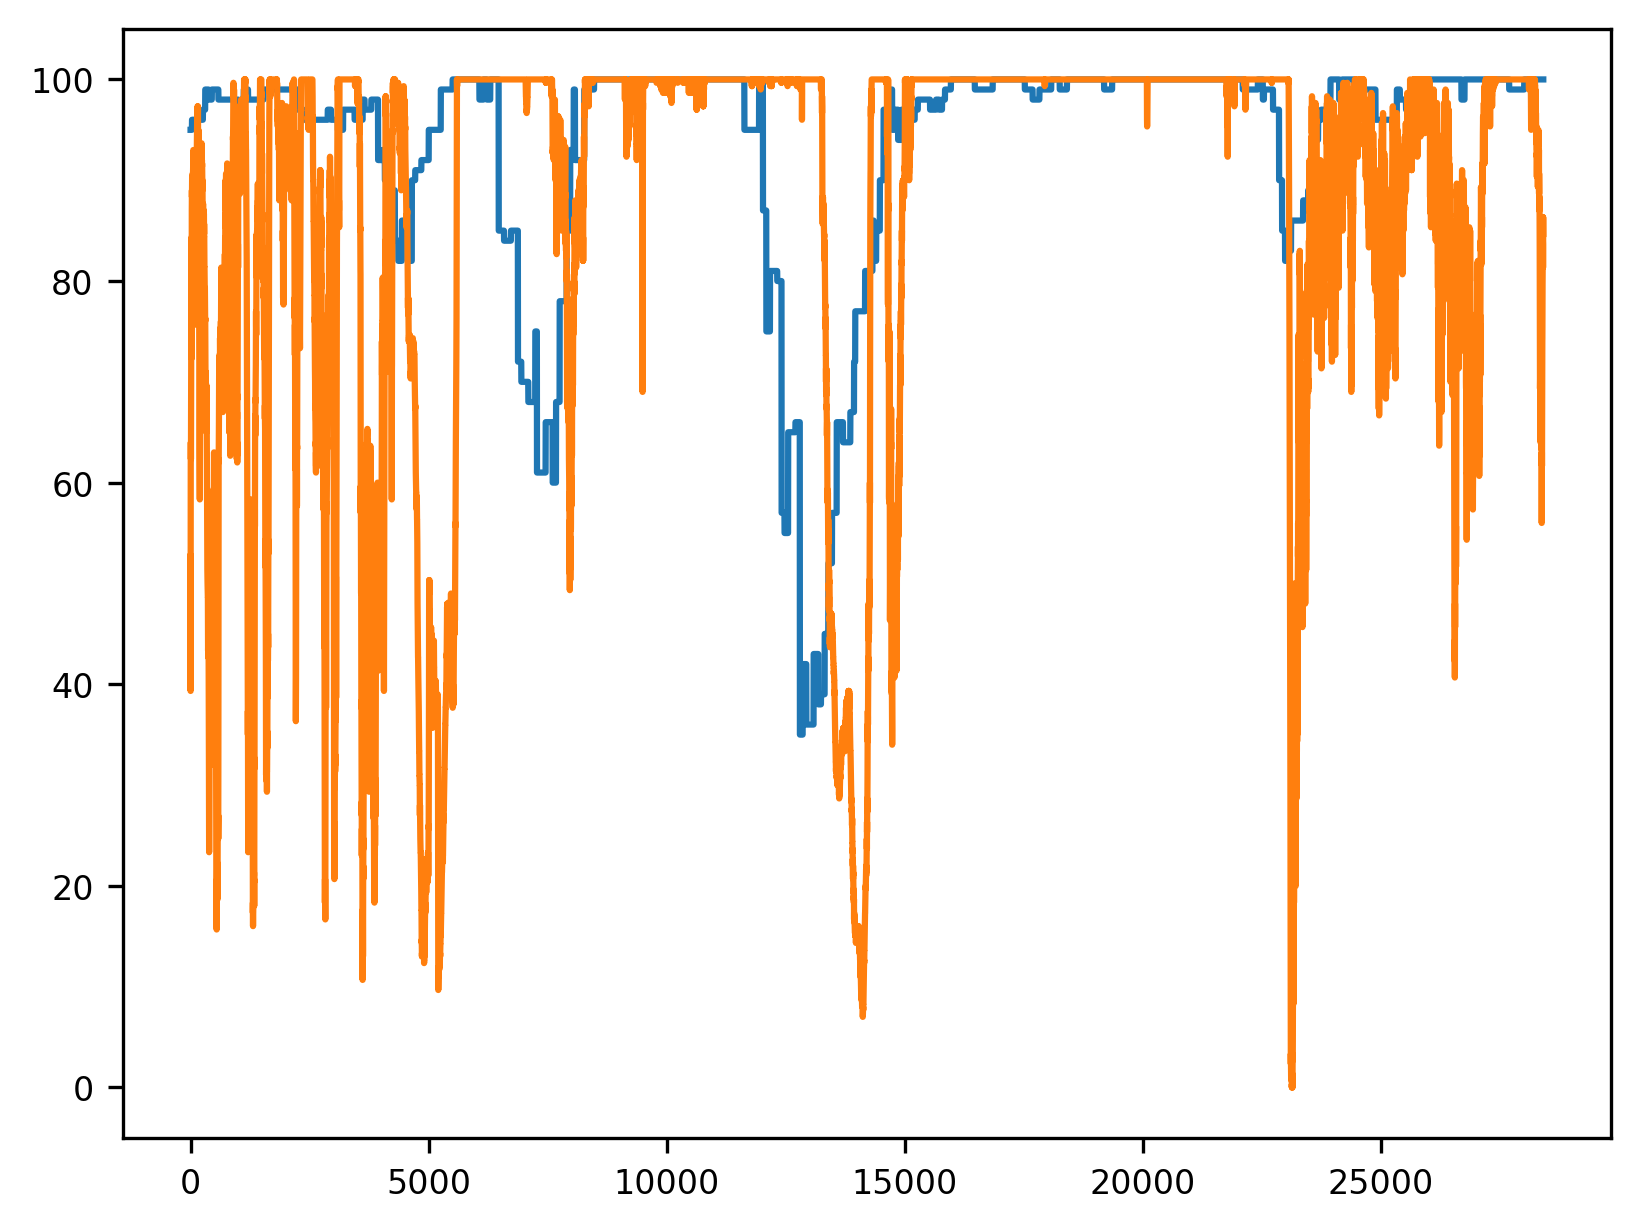

In [35]:
plt.plot(np.diag(modis_amsr_sic_sel))

plt.plot(a)

In [36]:
SIC

<xarray.Dataset> Size: 233MB
Dimensions:  (x: 3662, y: 1221, time: 13)
Coordinates:
  * x        (x) float64 29kB -29.99 -29.96 -29.94 -29.91 ... 59.95 59.97 60.0
  * y        (y) float64 10kB 89.99 89.96 89.94 89.91 ... 60.08 60.05 60.03 60.0
  * time     (time) datetime64[ns] 104B 2022-03-14 2022-03-16 ... 2022-04-11
Data variables:
    z        (time, y, x) float32 233MB ...

RMSE: 16.604453152719717
MAE: 8.132266717044283
Bias: -2.999539174121473


Text(0.05, 0.95, 'RMSE: 16.60\nMAE: 8.13\nBias: -3.00')

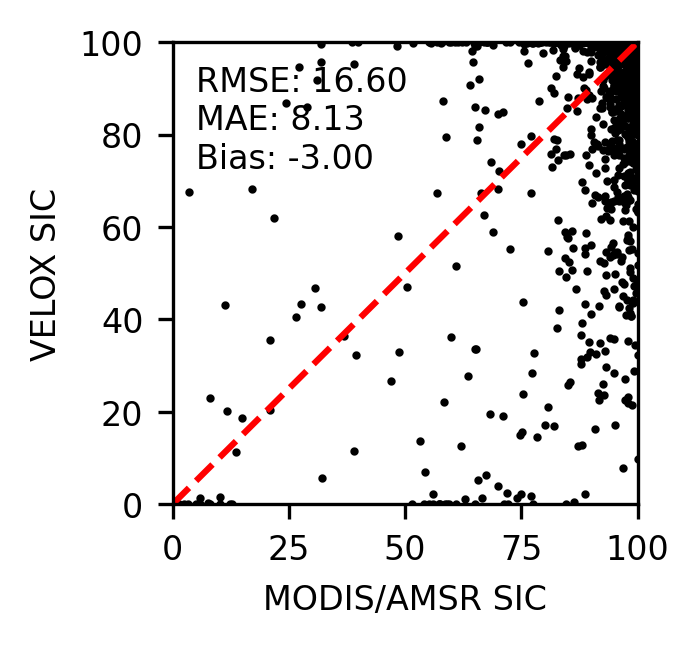

In [37]:
coarse = 150
ds_sic_coarsen = ds_sic.coarsen(time=coarse, boundary='trim').mean()

velox_sic = ds_sic_coarsen['counts'].sel(class_bin=[3, 4]).sum(dim='class_bin') / 300 * 100
modis_amsr_sic = ds_sic_coarsen['sic'] 

dupl_mask = ~modis_amsr_sic.indexes['time'].duplicated()
modis_amsr_sic = modis_amsr_sic[dupl_mask]
velox_sic = velox_sic[dupl_mask]

velox_sic = velox_sic[modis_amsr_sic <= 100]
modis_amsr_sic = modis_amsr_sic[modis_amsr_sic <= 100]

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
rmse = np.sqrt(mean_squared_error(modis_amsr_sic, velox_sic))
mae = mean_absolute_error(modis_amsr_sic, velox_sic)
bias = np.mean(velox_sic - modis_amsr_sic).values

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'Bias: {bias}')

fig, ax = plt.subplots(1, 1, figsize=(2, 2))

ax.scatter(modis_amsr_sic, velox_sic, s=1, c='k')
ax.plot([0, 100], [0, 100], 'r--')
ax.set_xlabel('MODIS/AMSR SIC')
ax.set_ylabel('VELOX SIC')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

ax.text(0.05, 0.95, f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nBias: {bias:.2f}', transform=ax.transAxes, ha='left', va='top')

0
slice('2022-03-20T10:35:00', '2022-03-20T10:50:00', None)
1
slice('2022-03-21T11:39:00', '2022-03-21T11:44:00', None)
2
slice('2022-03-28T10:28:00', '2022-03-28T11:05:00', None)
3
slice('2022-03-28T13:13:30', '2022-03-28T13:21:30', None)
4
slice('2022-03-28T14:12:30', '2022-03-28T14:27:00', None)
5
slice('2022-03-29T14:27:00', '2022-03-29T14:37:30', None)
6
slice('2022-03-30T09:46:30', '2022-03-30T09:52:00', None)
7
slice('2022-04-01T09:25:00', '2022-04-01T09:32:30', None)
8
slice('2022-04-01T10:21:00', '2022-04-01T10:54:00', None)
9
slice('2022-04-01T11:22:30', '2022-04-01T11:43:30', None)
10
slice('2022-04-01T12:20:00', '2022-04-01T12:51:00', None)
11
slice('2022-04-01T13:36:00', '2022-04-01T13:52:30', None)
12
slice('2022-04-04T09:18:30', '2022-04-04T09:23:30', None)
13
slice('2022-04-04T12:24:00', '2022-04-04T13:01:00', None)
14
slice('2022-04-04T13:19:30', '2022-04-04T13:40:00', None)
15
slice('2022-04-04T14:08:00', '2022-04-04T14:30:00', None)


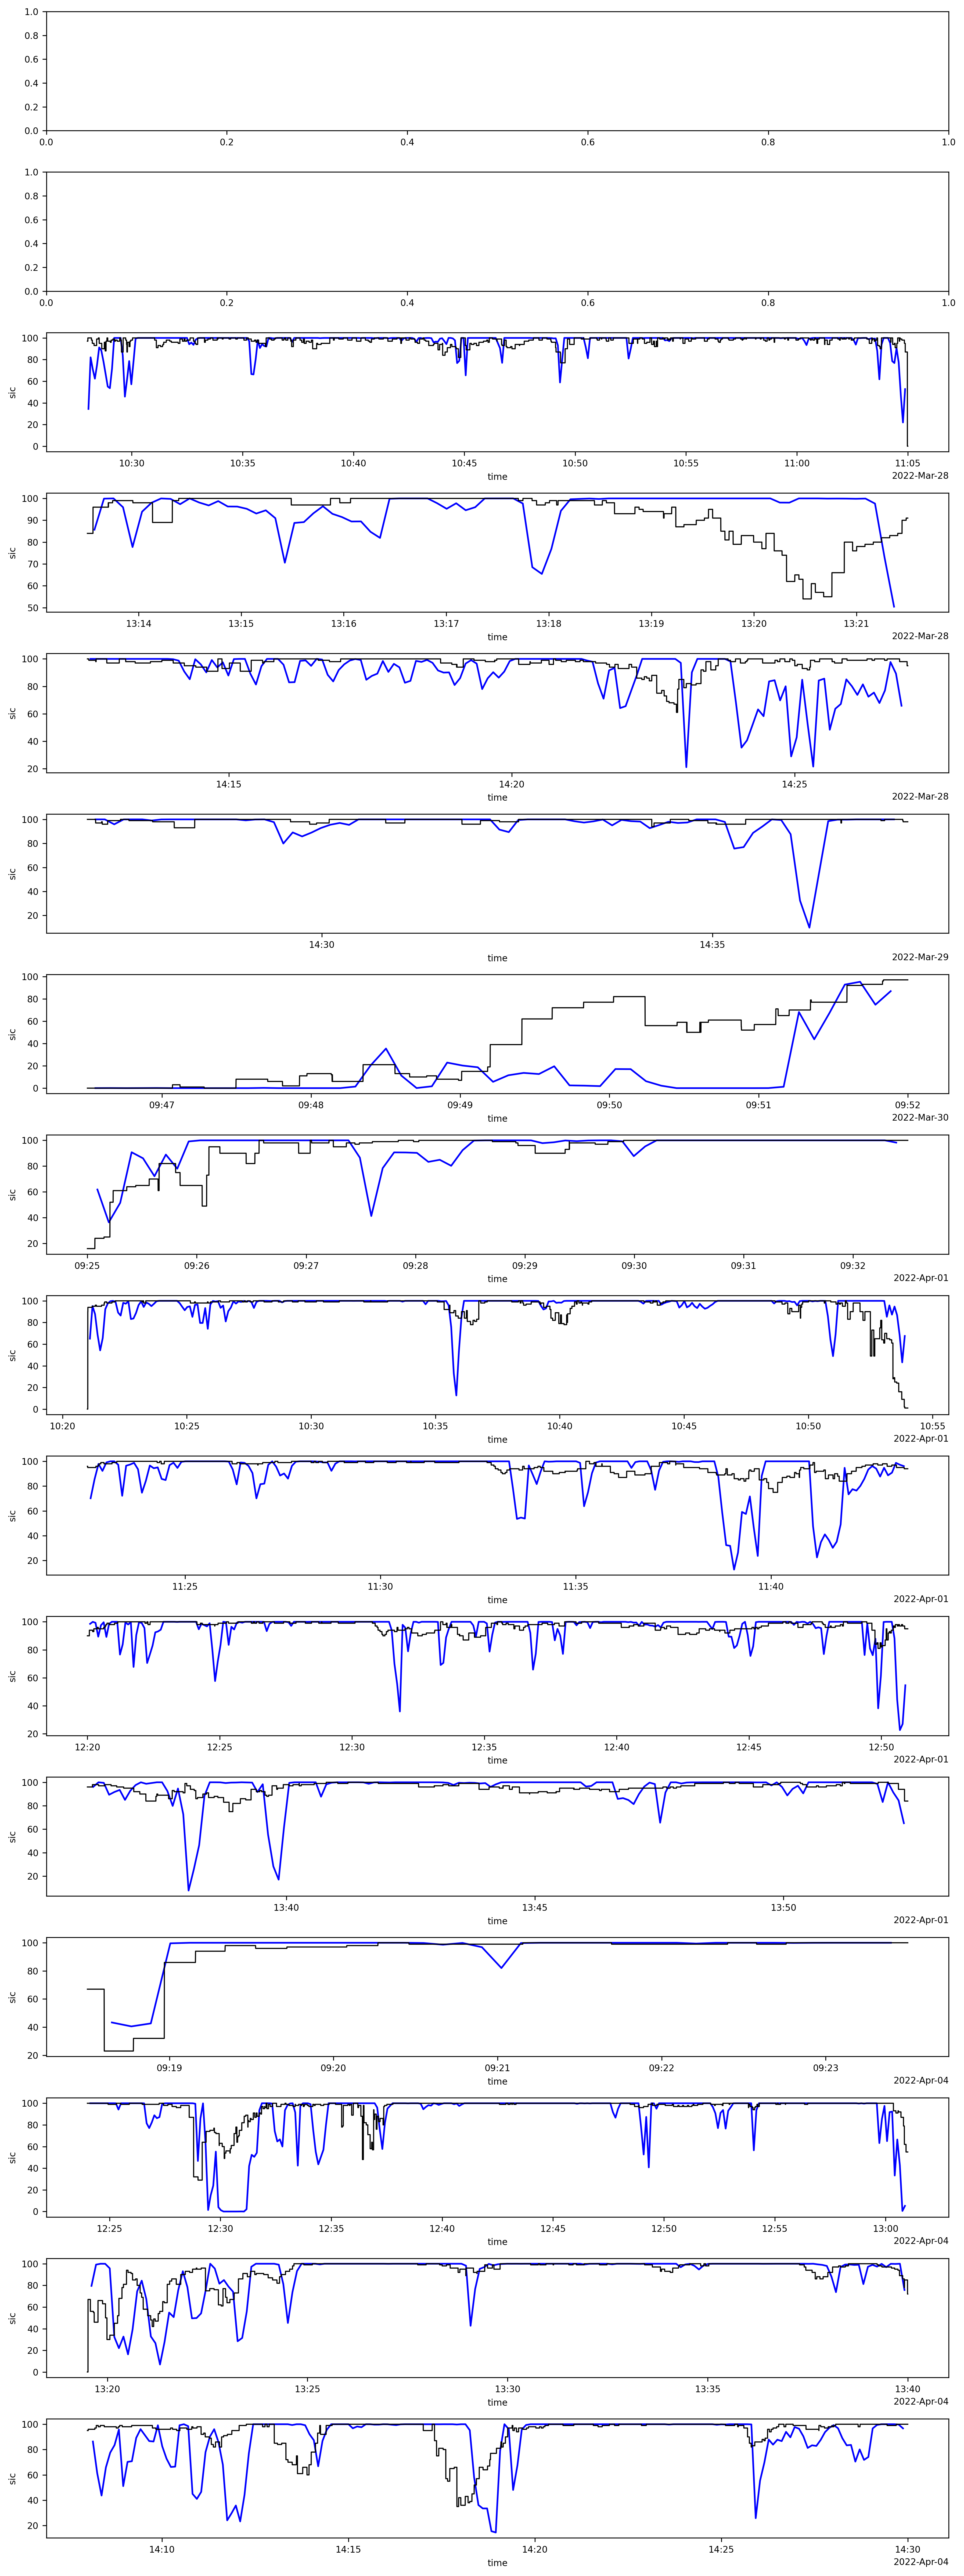

In [38]:
N = len(df_files['key'].values)

fig, ax = plt.subplots(N, 1, figsize=(12, 2 * N))

for i, slice_key in enumerate(df_files['key'].values):
    print(i)

    time_slice = slice(slice_key.split('_')[0], slice_key.split('_')[1])
    print(time_slice)
    try:
        (100 - (ds_sic_coarsen.counts.sel(time=time_slice) / 3).isel(class_bin=[0, 1]).sum(dim='class_bin')).plot(ax=ax[i], c='blue')
        ds_sic.sic.sel(time=time_slice).plot(ax=ax[i], color='k', lw=1)

        vel_sic = ds_sic.where(ds_sic['distance'] < 1, drop=True)['counts'].sel(time=time_slice, class_bin=[3, 4]).sum(dim='class_bin') / 300 * 100 
        mod_sic = ds_sic.where(ds_sic['distance'] < 1, drop=True)['sic'].sel(time=time_slice)

        rmse = np.sqrt(mean_squared_error(mod_sic, vel_sic))
        ax[i].set_title(f'{time_slice} - RMSE: {rmse:.2f}')

    except:
        pass

plt.tight_layout()

<>:80: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\s'
<>:90: SyntaxWarning: invalid escape sequence '\m'
<>:91: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\s'
<>:90: SyntaxWarning: invalid escape sequence '\m'
<>:91: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_100556/2577728608.py:80: SyntaxWarning: invalid escape sequence '\m'
  f'$N_\mathrm{{SSD}} \sim (x_\mathrm{{SEG}})^{{{a:.2f}}} $',
/tmp/ipykernel_100556/2577728608.py:80: SyntaxWarning: invalid escape sequence '\s'
  f'$N_\mathrm{{SSD}} \sim (x_\mathrm{{SEG}})^{{{a:.2f}}} $',
/tmp/ipykernel_100556/2577728608.py:90: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x_\mathrm{SEG}$ (m²)')
/tmp/ipykernel_100556/2577728608.py:91: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$N_\mathrm{SSD}$ (km$^{-2}$)')
/tmp/ipykernel_100556/2577728608.py:35: Run

1
N_1 = 9587923.60 * x^-1.69 	 R² = 0.9875, std_err = 0.0672
-1.6878262986901804 9587923.596459204
2
N_2 = 53059094.57 * x^-1.60 	 R² = 0.9963, std_err = 0.0346
-1.6032594796994233 53059094.57303735
3
N_3 = 23466845.60 * x^-1.25 	 R² = 0.9925, std_err = 0.0384
-1.246355185255545 23466845.597494043
4
N_4 = 30328281.32 * x^-1.50 	 R² = 0.9932, std_err = 0.0438
-1.498819135423696 30328281.32198623


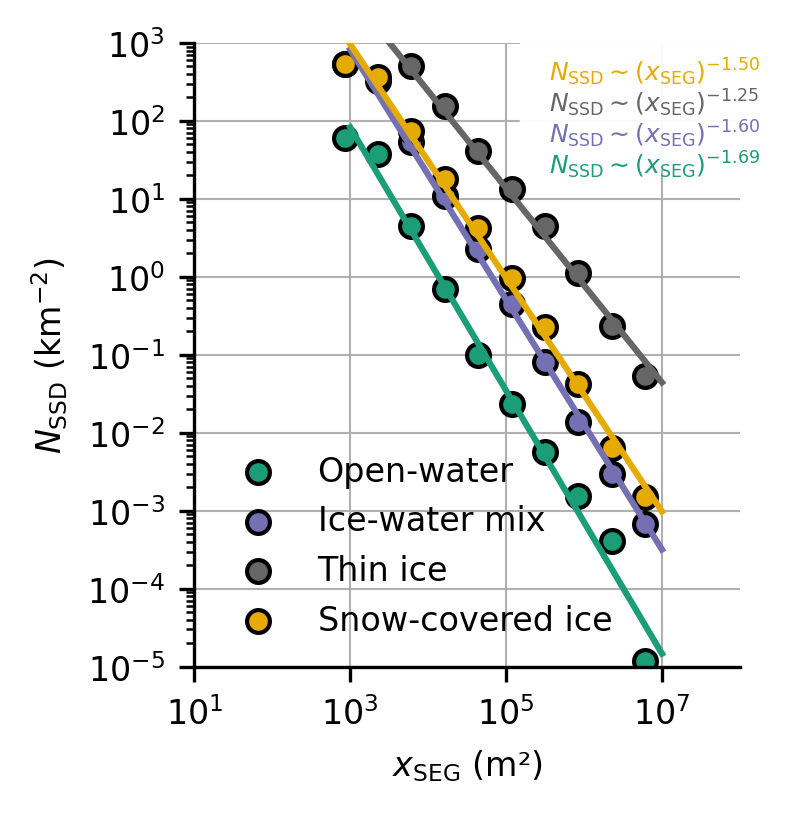

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(3.15, 2.7))
cc = 0

legend = []
legend_labels = ['Open-water', 'Ice-water mix', 'Thin ice', 'Snow-covered ice']

plt.rcParams.update({
    'font.size' : 8,
    'axes.labelsize' : 8,
    'axes.titlesize' : 8,
    'xtick.labelsize' : 6,
    'ytick.labelsize' : 6,
    'legend.fontsize' : 6
    })

colors = np.array([[0.10588235, 0.61960784, 0.46666667, 1.],
                [0.45882353, 0.43921569, 0.70196078, 1.],
                [0.4       , 0.4       , 0.4       , 1.],
                [0.90196078, 0.67058824, 0.00784314, 1.],
])

for i in range(4):
    ice_areas = ds['segment_size'][ds.segment_label == i+1].values * 100

    print(i+1)

    N = ice_areas.sum() * 100

    #h = ax.hist(ice_areas, bins=np.logspace(1, 6, 15), alpha=.5, histtype='step', density=True)

    h = np.histogram(ice_areas, bins=np.logspace(1, 7, 15), density=True)

    bin_centers = np.sqrt(h[1][:-1] * h[1][1:])
    x = np.log10(bin_centers)
    y = np.log10(h[0] * N / 1e5) 

    mask = np.isfinite(x) & np.isfinite(y)

    x = x[mask]
    y = y[mask]


    ax.scatter(bin_centers, h[0] * N / 1e5, s=30, edgecolor='k', c=colors[i])

    from scipy.optimize import curve_fit

    def func(x, a, b):
        return a * x + b



    popt, pcov = curve_fit(func, x, y)

    #ax.scatter(x, y, s=30, edgecolor='k')

    a = popt[0]
    b = 10 ** popt[1]

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    ### nicely print the results

    print(f'N_{i+1} = {b:.2f} * x^{a:.2f} \t R² = {r_value**2:.4f}, std_err = {std_err:.4f}')
    

    xx = np.logspace(3, 7, 100)

    ax.plot(xx, b * xx ** a, c=colors[i])

    print(a, b)

    ax.set_xscale('log')
    ax.set_yscale('log')
    SSD = "SSD"
    SEG = "SEG"

    ax.text(
        0.65,
        cc+.79,
        f'$N_\mathrm{{SSD}} \sim (x_\mathrm{{SEG}})^{{{a:.2f}}} $',
        fontsize=6,
        transform=ax.transAxes,
        color=colors[i],
    )
    cc += .05

    ax.set_xlim(1e1, 1e8)
    ax.set_ylim(1e-5, 1e3)

    ax.set_xlabel('$x_\mathrm{SEG}$ (m²)')
    ax.set_ylabel('$N_\mathrm{SSD}$ (km$^{-2}$)')

    ### add a rectangle to the upper right corner in the background

    ax.add_patch(plt.Rectangle((0.6, 0.8), 0.4, 0.2, fill=True, color='w', alpha=0.5, transform=ax.transAxes, zorder=1))


    #ax.set_title('Segment area distribution')

    legend.append(ax.scatter([], [], s=30, edgecolor='k', c=colors[i]),)

    #legend_labels[i] += f' $y \sim x^{{{a:.2f}}} $'

ax.legend(legend, legend_labels, 
          loc='lower left', 
          fontsize=8,
          frameon=False)
ax.set_aspect('equal')
ax.axes.grid(True, linestyle='-', linewidth=0.5, which='major')
ax.spines[['top', 'right']].set_visible(False)

plt.savefig('../../../plots/segment_area_distribution_andre_v1.png', dpi=300, bbox_inches='tight')

In [40]:
areas = ds.segment_size.values.flatten()
area_labels = ds.segment_label.values.flatten()
ice_areas = areas[(area_labels == 3)|(area_labels == 4)]
ice_areas = areas

#fig, ax = plt.subplots(1, 1, figsize=(10, 2), sharex=True)
#h = ax.hist(ice_areas, bins=np.logspace(1, 6, 15), alpha=.5, histtype='step', density=True)
#plt.close()


from scipy import stats

bin_centers = np.sqrt(h[1][:-1] * h[1][1:])
x = np.log10(bin_centers)
y = np.log10(h[0] * 31.75) 

mask = np.isfinite(x) & np.isfinite(y)

x = x[mask]
y = y[mask]

#fig, ax = plt.subplots(1, 2, figsize=(4, 2))

#ax[0].scatter(x, y, s=30, edgecolor='k')

from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, x, y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# ax[0].plot(x, func(x, *popt), 'r')

# ax[0].text(0.45, 0.9, f'y = {popt[0]:.2f}x + {popt[1]:.2f}', fontsize=6, transform=ax[0].transAxes)

# R2 = 1 - np.sum((y - func(x, *popt))**2) / np.sum((y - np.mean(y))**2)

# ax[0].text(0.45, 0.8, f'R² = {R2:.4f}', fontsize=6, transform=ax[0].transAxes)

# ax[0].set_xlim(1, 6)
# ax[0].set_xticks(np.arange(1, 7))

# ax[0].set_ylim(-6, 0)
# ax[0].set_yticks(np.arange(-6, 1))

# ### now plot the power law fit

# x = bin_centers
# y = h[0] * 31.75

# #ax[1].scatter(x, y, s=30, edgecolor='k')

# a = popt[0]
# b = 10 ** popt[1]

# xx = np.logspace(1, 6, 100)

# ax[1].plot(xx, b * xx ** a, 'r')

# print(a, b)

# ax[1].set_xscale('log')
# ax[1].set_yscale('log')

# ax[1].set_xlim(10, 1e6)
# ax[1].set_ylim(1e-6, 1)

# ax[1].text(
#     0.45,
#     0.9,
#     f'$y \sim x^{{{a:.2f}}} $',
#     fontsize=6,
#     transform=ax[1].transAxes,
# )

/tmp/ipykernel_100556/4104960551.py:15: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(h[0] * 31.75)


In [41]:
np.unique(ds['segment_date'])

array(['2022-03-28', '2022-03-29', '2022-03-30', '2022-04-01',
       '2022-04-04'], dtype='<U10')

In [42]:
ds_segment_file = '/projekt_agmwend/home_rad/Joshua/Mueller_et_al_2024/data/segmented_data_with_edge_distance_nadir_v1.nc'

if os.path.exists(ds_segment_file):
    ds = xr.open_dataset(ds_segment_file)
else:
    ds['segment_edge_dist'] = xr.DataArray(np.zeros(ds.segment_lat.size) * np.nan, dims=('segment'))
    ds['segment_sic'] = xr.DataArray(np.zeros(ds.segment_lat.size) * np.nan, dims=('segment'))
    segment_edge_dist = np.zeros(ds.segment_lat.size)  ### in km
    selected_edge_points = np.zeros((ds.segment_lat.size, 2))

    ds_miz_edge_full = SIC.where((SIC['z'] > 9) & (SIC['z'] < 11)).stack(feature=('time','x', 'y')).dropna('feature')
    #ds_miz_edge = SIC.where((SIC['z'] > 9) & (SIC['z'] < 11)).mean(dim='time').stack(feature=('x', 'y')).dropna('feature')

    for i, seg in tqdm(enumerate(ds.segment), total=ds.segment.size):
        # if ds.segment_size.isel(segment=i) < 100:
        #     continue
        lat = ds.segment_lat.isel(segment=i)
        lon = ds.segment_lon.isel(segment=i)

        date = ds.segment_date.isel(segment=i)#.dt.strftime('%Y-%m-%d')
        ds_miz_edge = ds_miz_edge_full.sel(time=date)

        miz_lats = ds_miz_edge.y.values
        miz_lons = ds_miz_edge.x.values

        if np.isnan(lat) or np.isnan(lon):
            continue

        haversine_dist = haversine_sklearn(lat, lon, miz_lats, miz_lons).flatten()
        
        min_dist_index = haversine_dist.argmin()

        min_dist_lon = miz_lons[min_dist_index]
        min_dist_lat = miz_lats[min_dist_index]

        edge_dist = haversine_dist[min_dist_index]

        ds['segment_edge_dist'][i] = edge_dist
        ds['segment_sic'][i] = SIC.sel(x=lon, method='nearest').sel(y=lat, method='nearest').sel(time=date).z.values
        segment_edge_dist[i] = edge_dist

        selected_edge_points[i, 0] = min_dist_lon
        selected_edge_points[i, 1] = min_dist_lat

    ds['segment_edge_dist'] = xr.DataArray(segment_edge_dist, dims=('segment')) 
    ds.to_netcdf('../../../data/segmented_data_with_edge_distance_nadir_v1.nc', mode='w')

In [43]:
ds_training = xr.open_dataset('../../../data/training.nc')
train_lat = ds_training.lat.values
train_lon = ds_training.lon.values

(1221, 3662) (1221, 3662)


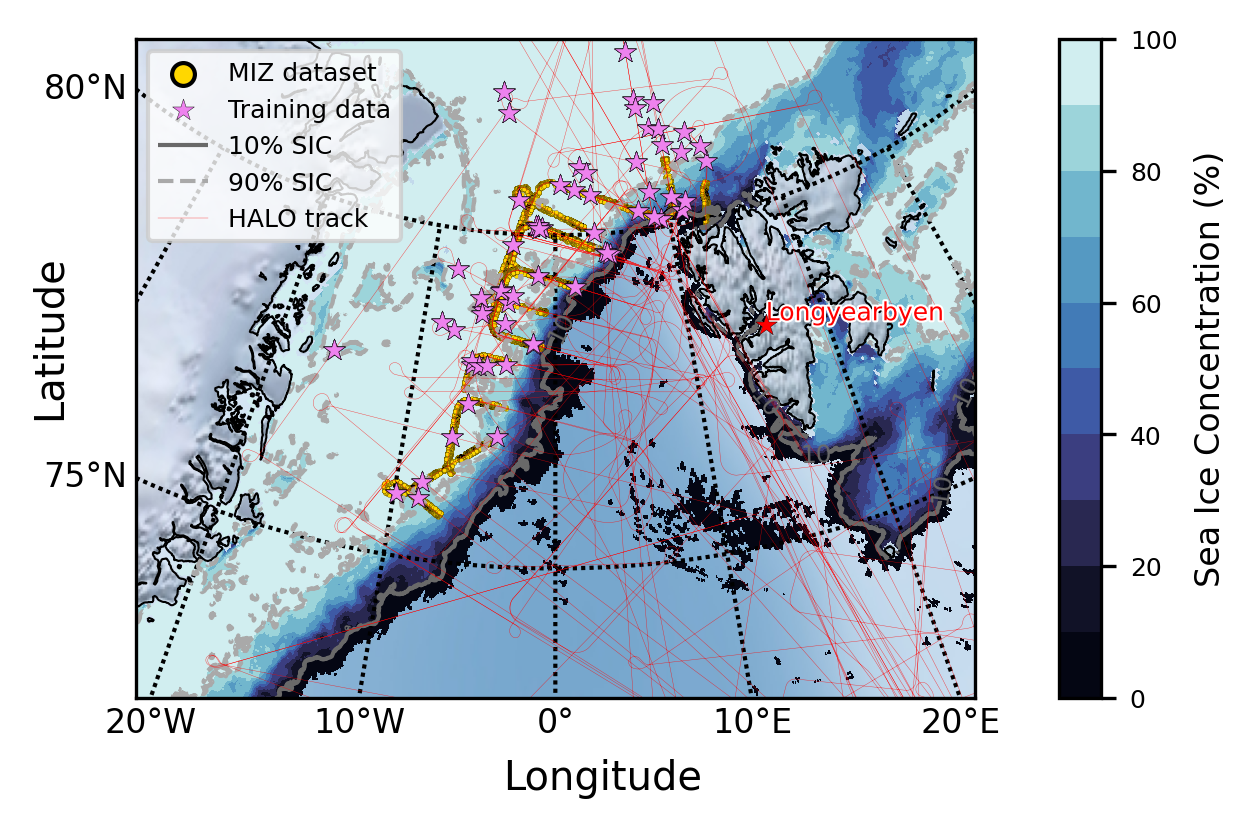

In [44]:
from mpl_toolkits.basemap import Basemap
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np

SIC = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_unified_data/amsr_modis_sic.nc')

# projection center point
lon0 = 0
lat0 = 78

plt.rcParams['font.size'] = 8

fig, ax = plt.subplots(1, 1, figsize=(4.15, 4.15))

m = Basemap(projection='stere', resolution='h',
        lat_0=lat0, lon_0=lon0,  lat_ts=lat0, width=1400000, height=1100000, ax=ax)

m.drawmeridians(np.arange(0, 360, 10), labels=[0,0,0,1])  # left, right, top, bottom
m.drawparallels(np.arange(0, 90, 5), labels=[1,0,0,0])
m.shadedrelief()

X, Y = np.meshgrid(SIC.x.values, SIC.y.values)

X, Y = m(X, Y)  

print(X.shape, Y.shape)

data = SIC.mean(dim='time')['z']
data = data.where((data != 0) & (data < 100))

im = m.contourf(X, Y, data, cmap=cmocean.cm.ice, vmin=10, vmax=100, levels=10, alpha=1,)

cs = m.contour(X, Y, data, levels=[10], colors='dimgray', linewidths=1)
ax.clabel(cs, inline=1, fontsize=6)
handles_10, labels_10 = cs.legend_elements()


cs = m.contour(X, Y, data, levels=[90], colors='darkgray', linewidths=1, linestyles='dashed')
handles_80, labels_80 = cs.legend_elements()
#ax.clabel(cs, inline=1, fontsize=6)

m.drawcoastlines(linewidth=0.5)

lons = ds.segment_lon.values.flatten()
lats = ds.segment_lat.values.flatten()

x, y = m(lons, lats)

#m.scatter(x, y, c=ds.segment_label.values.flatten(), cmap=cmap, norm=norm, s=2, zorder=100)
im1 = m.scatter(x, y, c='gold', s=1, zorder=1, edgecolor='k', lw=.05)


cbar = m.colorbar(im, location='right', pad="10%", label='Sea Ice Concentration (%)')
cbar.ax.yaxis.set_ticks_position('right')

legend = []

legend.append(ax.scatter([], [], s=30, edgecolor='k', c='gold'),)
legend_labels = ['Open Water', 'Ice Water Mix', 'Thin Ice', 'Snow-Covered','Training data', '10% SIC', '90% SIC', ]
legend_labels = ['MIZ dataset','Training data', '10% SIC', '90% SIC',]

# for i in range(4):
#     legend.append(ax.scatter([], [], s=30, edgecolor='k', c=colors[i]),)

#     #legend_labels[i] += f' $y \sim x^{{{a:.2f}}} $'

x, y = m(train_lon, train_lat)

im = m.scatter(x, y, c='violet', s=30, zorder=10, marker='*', edgecolor='k', lw=.1)
legend.append(im)
legend.append(handles_10[0])
legend.append(handles_80[0])



y, x = [78.22300973348118], [15.655859070165498]
x, y = m(x, y)

m.scatter(x, y, c='r', s=30, zorder=100, marker='*', edgecolor='k', lw=.1)

text = ax.text(x[0]+1, y[0]+0.3, 'Longyearbyen', fontsize=6, color='r', ha='left', va='bottom', transform=ax.transData)
text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='white'), path_effects.Normal()])


ds_tracks = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_unified_data/unified_gps_new.nc')
ds_tracks.coarsen(time=100, boundary='trim').mean()

x, y = m(ds_tracks.lon.values, ds_tracks.lat.values)

im = m.plot(x, y, lw=.1, c='r', alpha=0.75)
legend.append(im[0])
legend_labels.append('HALO track')

ax.legend(legend, legend_labels, 
          loc='upper left', 
          fontsize=6,
          frameon=True,
          ).set_zorder(101)

ax.xaxis.set_label_position('bottom')
ax.yaxis.set_label_position('right')


figx = fig.supxlabel('Longitude')
figy = fig.supylabel('Latitude')

figx.set_position([0.5, 0.15])
figy.set_position([0.04, 0.52])

plt.savefig('../../../plots/make_plots_map_v8_andre.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
# SIC_sel = SIC
# ds_miz_edge = SIC_sel.where((SIC_sel['z'] > 9) & (SIC_sel['z'] < 11))


# fig, ax = plt.subplots(2, 1, figsize=(3.15, 6))

# ds_miz_edge.mean(dim='time').z.plot.imshow(cmap='gray', x='x', add_colorbar=False, ax=ax[0])
# im = ax[0].scatter(ds.segment_lon, ds.segment_lat, c=ds.segment_label, cmap=cmap, s=np.log10(ds.segment_size)**2, edgecolors='k', linewidths=0, alpha=.7)
# cbar = plt.colorbar(im, label='Surface type')
# cbar.ax.set_yticks([0.5, 1.5, 2.5, 3.5])
# cbar.ax.set_yticklabels(['Open Water', 'Ice-Water Mix', 'Thin Ice', 'Snow-Covered Ice'])
# ax[0].set_xlim(-20, 20)
# ax[0].set_ylim(75., 82.)

# plt.scatter(selected_edge_points[:, 0], selected_edge_points[:, 1], c='r', s=10, label='Selected Edge Points')

# ds_miz_edge = SIC_sel.where((SIC_sel['z'] > 9) & (SIC_sel['z'] < 11)).mean(dim='time')

# ds_miz_edge.z.plot.imshow(cmap='gray', x='x', add_colorbar=False, ax=ax[1])
# im = ax[1].scatter(ds.segment_lon, ds.segment_lat, c=ds.segment_edge_dist, cmap='viridis', s=np.log10(ds.segment_size)**2, edgecolors='k', linewidths=0, alpha=.7)
# plt.colorbar(im, label='Distance to Edge [km]')
# ax[1].set_xlim(-20, 20)
# ax[1].set_ylim(75., 82.)

# ax[1].scatter(selected_edge_points[:, 0], selected_edge_points[:, 1], c='r', s=10, label='Selected Edge Points')

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_100556/2417510207.py:22: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean $T_\mathrm{skin}$ (°C)')


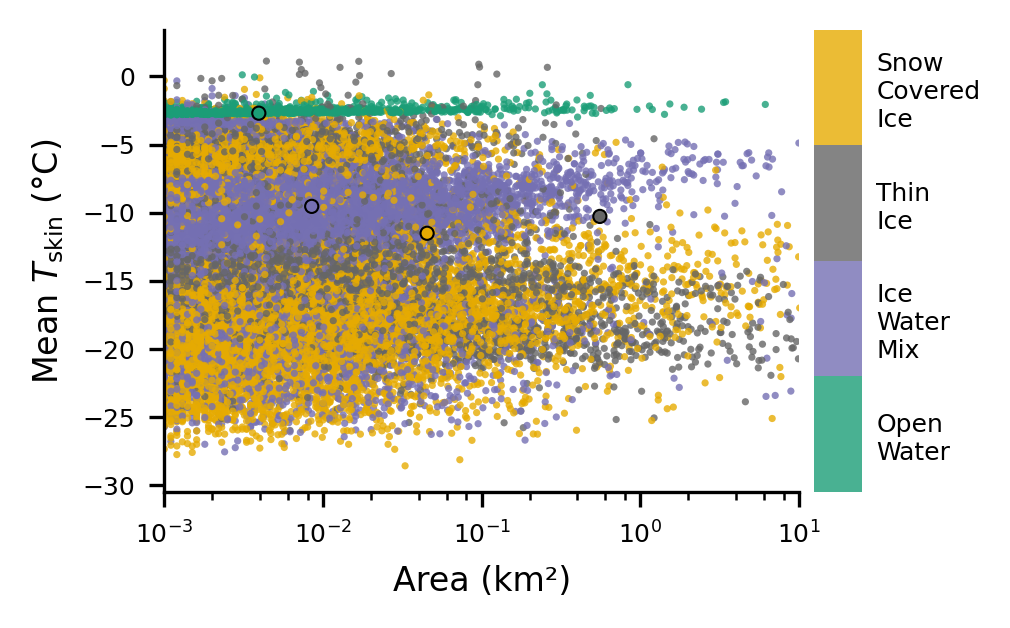

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

# Create a scatter plot
im = ax.scatter(ds['segment_size'] / 1e4, 
                ds['segment_T'], 
                c=ds['segment_label'], 
                cmap=cmap, 
                norm=norm,
                s=3, 
                edgecolors='none', 
                linewidth=0.2, 
                alpha=.8)

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the axes
ax.set_xlabel('Area (km²)')
ax.set_ylabel('Mean $T_\mathrm{skin}$ (°C)')

# Create a divider for the axis to append a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='7.5%', pad=0.05)
cax.grid(False)

# Add a colorbar to the plot with discrete levels
cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[1.5, 2.5, 3.5, 4.5])
#cbar.set_label('Surface type')
cbar.ax.set_yticklabels(['Open\nWater', 'Ice\nWater\nMix', 'Thin\nIce', 'Snow\nCovered\nIce'])
cbar.ax.yaxis.set_tick_params(width=0, length=0)
cbar.ax.yaxis.set_ticks_position('none')
cbar.ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
cbar.ax.set_frame_on(False)

dsgp_1 = ds.groupby('segment_label').mean()

ax.scatter(dsgp_1['segment_size'] / 1e4,
              dsgp_1['segment_T'],
              c=np.arange(4),
              cmap=cmap,
              s=10,
              edgecolors='black',
              linewidth=0.5,
              marker='o',
              zorder=10) 

### add the error bars
ax.xaxis.get_minor_locator().set_params(numticks=99, subs=[.2, .4, .6, .8])
ax.set_xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1])
ax.set_xlim([1e-3, 1e1])

plt.savefig('plot_segstats_scatter_tskin_size.png', dpi=300, bbox_inches='tight')
plt.savefig('plot_segstats_scatter_tskin_size.pdf', dpi=300, bbox_inches='tight')

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_100556/2694412806.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax[i,1].set_ylabel(f'{titles[i]}\n $T_\mathrm{{skin}}$ (°C)')


/home/jomueller/micromamba/envs/mamba_josh/lib/python3.12/site-packages/xarray/core/concat.py:540: UserWarning: No index created for dimension segment_label because variable segment_label is not a coordinate. To create an index for segment_label, please first call `.set_coords('segment_label')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)


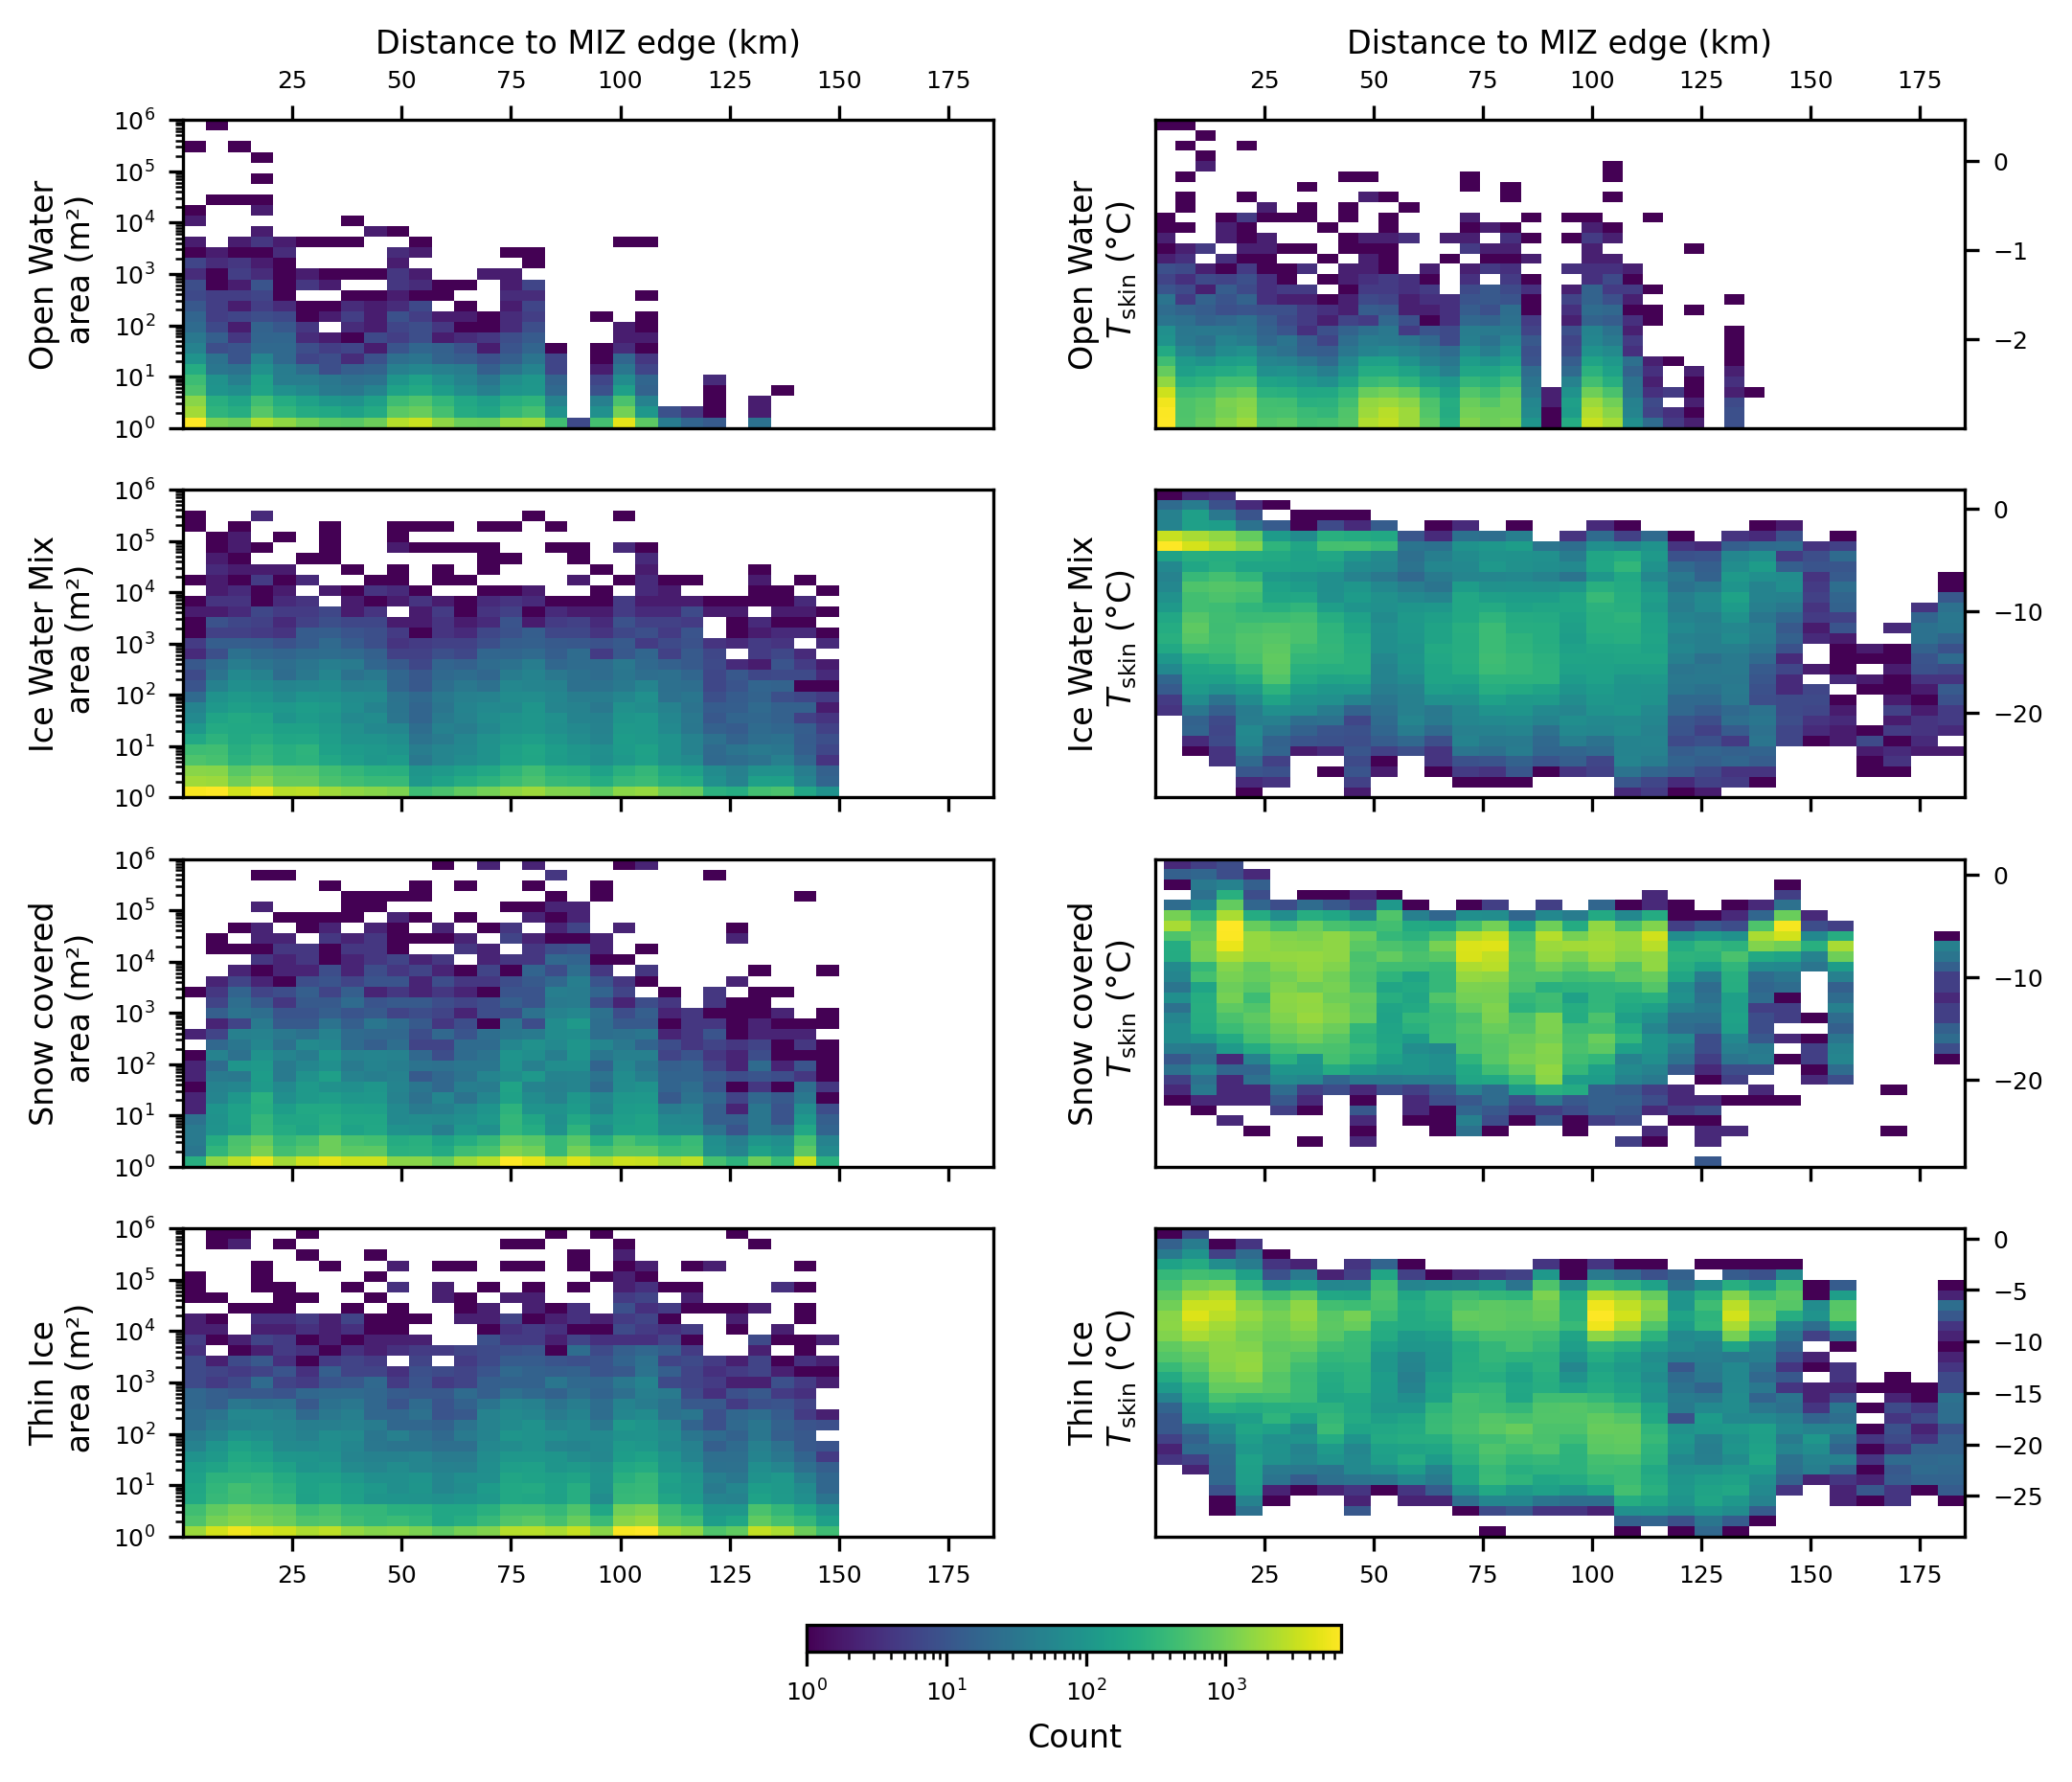

In [48]:

label_group_mean = ds.groupby('segment_label').median()
label_group_std = ds.groupby('segment_label').std()


x = ds['segment_edge_dist'].values
y = ds['segment_size'].values
c = ds['segment_label'].values
T = ds['segment_T'].values
std = ds['segment_std'].values

all_nan = np.isnan(x) | np.isnan(y) | np.isnan(c) | np.isnan(T) | np.isnan(std)

x = x[~all_nan]
y = y[~all_nan]
c = c[~all_nan]
T = T[~all_nan]
std = std[~all_nan]

from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm

fig, ax = plt.subplots(4, 2, figsize=(8, 8), sharex=True)

titles = ['Open Water', 'Ice Water Mix', 'Snow covered', 'Thin Ice']

for i in range(4):
    #ax[i,0].scatter(x[c == i + 1], y[c == i + 1], s=1, color=colors[i])
    ax[i,0].set_yscale('log')
    ax[i,0].hist2d(x[c == i + 1], y[c == i + 1], bins=(np.linspace(0, 150, 30), np.logspace(0, 6, 30)), cmap='viridis', norm=LogNorm())
    #ax[i,1].scatter(x[c == i + 1], T[c == i + 1], s=1, color=colors[i])
    ax[i,1].hist2d(x[c == i + 1], T[c == i + 1], bins=30, cmap='viridis', norm=LogNorm())
    ax[i,0].set_ylabel(f'{titles[i]}\n area (m²)')
    ax[i,1].set_ylabel(f'{titles[i]}\n $T_\mathrm{{skin}}$ (°C)')
    ax[i,1].yaxis.tick_right()

ax[0,0].xaxis.set_ticks_position('top')
ax[0,0].xaxis.set_label_position('top')
ax[0,1].xaxis.set_ticks_position('top')
ax[0,1].xaxis.set_label_position('top')
ax[0,0].set_xlabel('Distance to MIZ edge (km)')
ax[0,1].set_xlabel('Distance to MIZ edge (km)')

cb = fig.colorbar(ax[0,0].collections[0], ax=ax, orientation='horizontal', label='Count', shrink=0.3, pad=0.05, location='bottom')

plt.savefig('plot_segstats_hist2d_all_types_viridis.png', dpi=300, bbox_inches='tight')
plt.savefig('plot_segstats_hist2d_all_types_viridis.pdf', dpi=300, bbox_inches='tight')

<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_100556/2111083150.py:40: SyntaxWarning: invalid escape sequence '\m'
  axd['B'].set_ylabel('$T_\mathrm{skin}$ (°C)')
/tmp/ipykernel_100556/2111083150.py:41: SyntaxWarning: invalid escape sequence '\s'
  axd['C'].set_ylabel('$\sigma\,T_\mathrm{skin}$ (°C)')
/home/jomueller/micromamba/envs/mamba_josh/lib/python3.12/site-packages/xarray/core/concat.py:540: UserWarning: No index created for dimension segment_label because variable segment_label is not a coordinate. To create an index for segment_label, please first call `.set_coords('segment_label')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)
/home/jomueller/micromamba/envs/mamba_josh/lib/python3.12/site-packages/xarray/core/concat.py:540: UserWarning: No index created for d

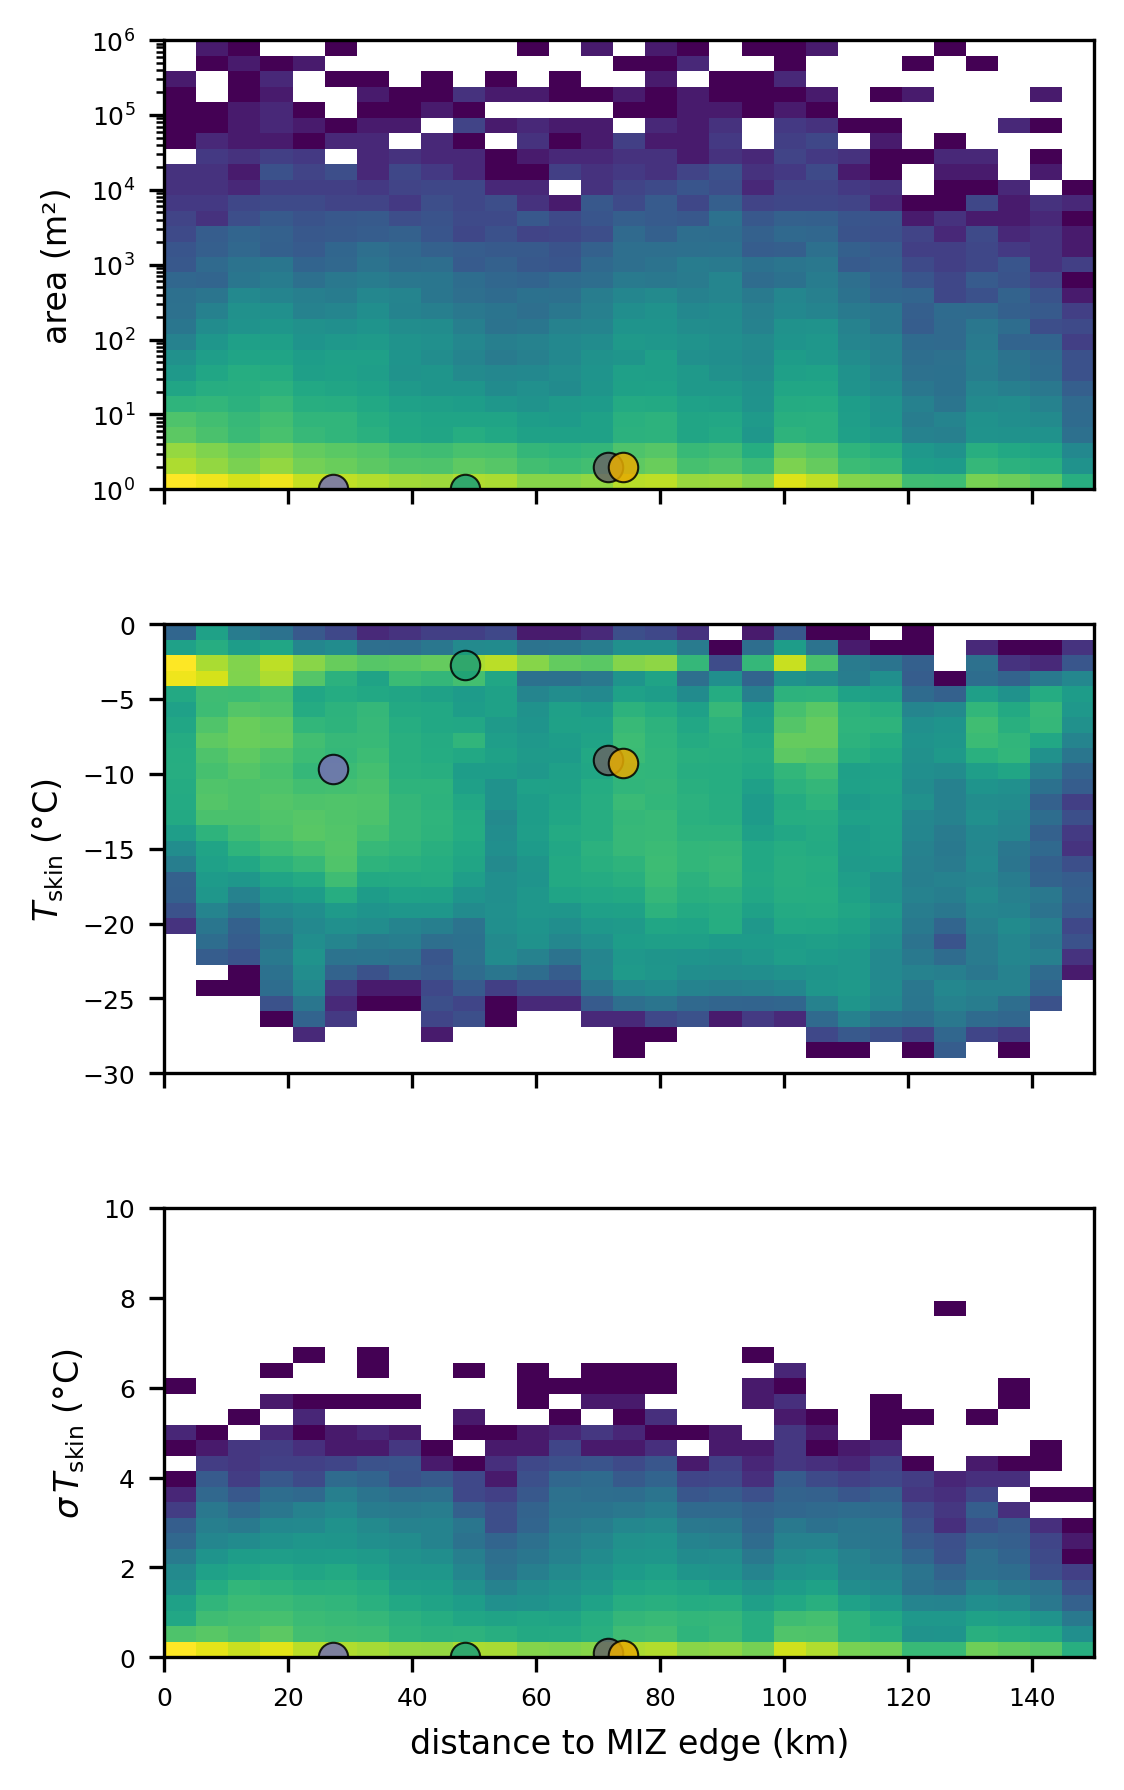

In [49]:
fig, axd = plt.subplot_mosaic(
    """A
    B
    C""", 
    figsize=(4, 7),
    gridspec_kw={
      'hspace': 0.3,
      'wspace': 0.3
    },
    sharex=True)
list_of_ax = [_[1] for _ in axd.items()]

import matplotlib as mpl

range_size = np.logspace(0, 6, 30)
range_dist = np.linspace(0, 150, 30)
range_temp = np.linspace(-30, 0, 30)
range_std  = np.linspace(0, 10, 30)
range_ecc  = np.linspace(0, 1, 30)

im = axd['A'].hist2d(x, y, bins=(range_dist, range_size), cmap='viridis', norm=LogNorm())
axd['A'].set_yscale('log')
axd['B'].hist2d(x, T, bins=(range_dist, range_temp), cmap='viridis', norm=LogNorm())
axd['C'].hist2d(x, std, bins=(range_dist, range_std), cmap='viridis', norm=LogNorm())

#fig.colorbar(h[3], ax=list_of_ax, orientation='vertical', label='Count', ticks=[1, 10, 20, 30, 40, 50], shrink=0.5, pad=0.05)

edge_dist_mean = ds.groupby('segment_label').median()['segment_edge_dist']
temp_mean = ds.groupby('segment_label').median()['segment_T']
size_mean = ds.groupby('segment_label').median()['segment_size']
std_mean = ds.groupby('segment_label').median()['segment_std']

for i in range(4):
    axd['A'].scatter(edge_dist_mean[i], size_mean[i], s=50, color=colors[i], edgecolors='black', linewidth=0.5,alpha=.85, marker='o')
    axd['B'].scatter(edge_dist_mean[i], temp_mean[i], s=50, color=colors[i], edgecolors='black', linewidth=0.5,alpha=.85, marker='o')
    axd['C'].scatter(edge_dist_mean[i], std_mean[i], s=50, color=colors[i], edgecolors='black', linewidth=0.5, alpha=.85,marker='o')


axd['A'].set_ylabel('area (m²)')
axd['B'].set_ylabel('$T_\mathrm{skin}$ (°C)')
axd['C'].set_ylabel('$\sigma\,T_\mathrm{skin}$ (°C)')
axd['C'].set_xlabel('distance to MIZ edge (km)')


plt.savefig('plot_segstats_hist2d_all_vars_to_miz_edge.png', dpi=300, bbox_inches='tight')
plt.savefig('plot_segstats_hist2d_all_vars_to_miz_edge.pdf', dpi=300, bbox_inches='tight')


1.8608105 -28.935991 7.1605390569771465 0.0


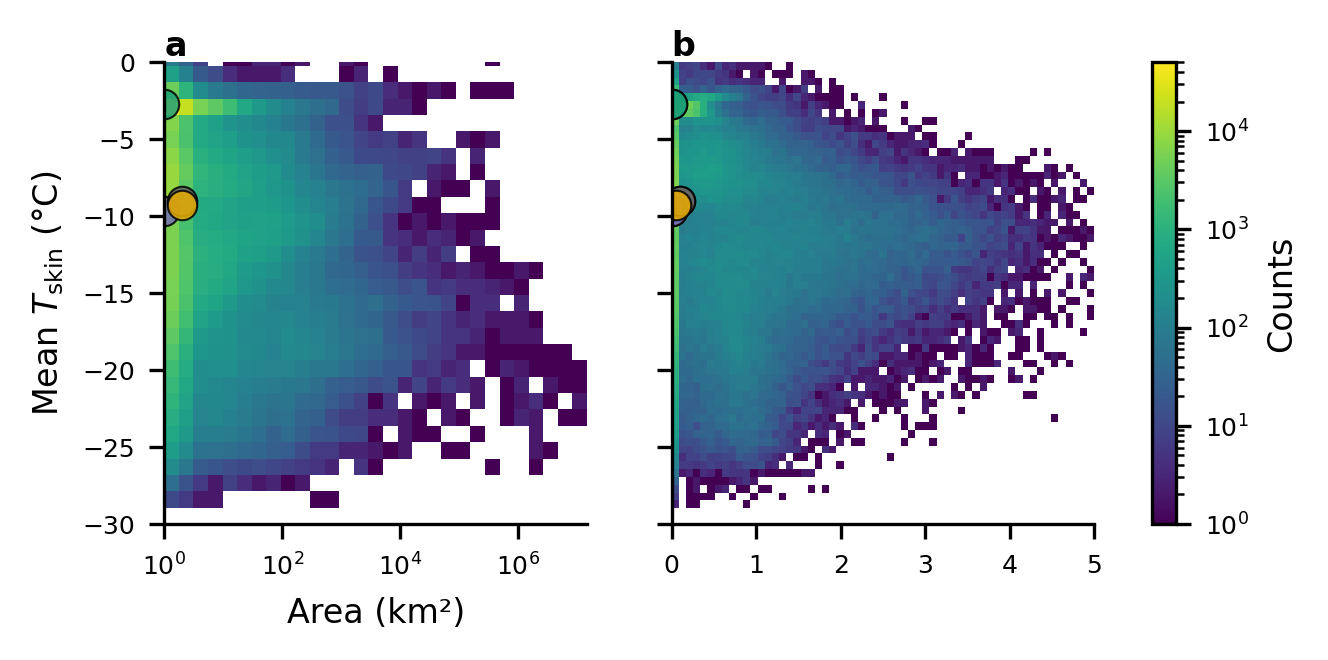

In [50]:


fig, ax = plt.subplots(1, 2, figsize=(5, 2), sharey=True)

Tmax = np.nanmax(T)
Tmin = np.nanmin(T)

sizemax = np.log10(np.nanmax(y))
sizemin = np.log10(np.nanmin(y))


print(Tmax, Tmin, sizemax, sizemin)

h = ax[0].hist2d(y, T, bins=(np.logspace(sizemin, sizemax, 30), np.linspace(Tmin, Tmax, 30)), cmap='viridis', norm=LogNorm())
ax[0].set_xscale('log')
ax[0].set_xlabel('Area (km²)')
ax[0].set_ylabel(r'Mean $T_\mathrm{skin}$ (°C)')
#ax[0].set_xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])
for i in range(4):
    ax[0].scatter(size_mean[i]/1e4, temp_mean[i], s=50, color=colors[i], edgecolors='black', linewidth=0.5,alpha=.85, marker='o')

ax[1].hist2d(std, T, bins=(np.linspace(0, 5, 60), np.linspace(-30, 0, 60)) , cmap='viridis', norm=LogNorm())
#ax[1].set_xlabel(r'$\sigma\,T_\mathrm{skin}$ (°C)')
#ax[1].set_xticks([0, 1, 2, 3, 4, 5])
#ax[1].set_yticks([-30, -25, -20, -15, -10, -5, 0])


for i in range(4):
    ax[1].scatter(std_mean[i], temp_mean[i], s=50, color=colors[i], edgecolors='black', linewidth=0.5,alpha=.85, marker='o')

ax[0].spines[['top', 'right']].set_visible(False)
ax[1].spines[['top', 'right']].set_visible(False)

cb = fig.colorbar(h[3], ax=ax, orientation='vertical', label='Counts')
#cb.set_ticklabels([1, 5, 10, 30, 50, 70])
#ax[0].xaxis.get_minor_locator().set_params(numticks=99, subs=[.2, .4, .6, .8])
### add the a b label

ax[0].text(0, 1.07, 'a', transform=ax[0].transAxes, fontsize=8, fontweight='bold', va='top')
ax[1].text(0, 1.07, 'b', transform=ax[1].transAxes, fontsize=8, fontweight='bold', va='top')

for i in range(4):
    ax[0].scatter(size_mean[i], temp_mean[i], s=50, color=colors[i], edgecolors='black', linewidth=0.5,alpha=.85, marker='o')
    ax[1].scatter(std_mean[i], temp_mean[i], s=50, color=colors[i], edgecolors='black', linewidth=0.5,alpha=.85, marker='o')

plt.savefig('../../../plots/make_plots_hist2d_tskin_area_sigma_.png', bbox_inches='tight', dpi=300)
#plt.savefig('../../plots/plot_segstats_hist2d_tskin_area_sigma_.pdf', bbox_inches='tight')

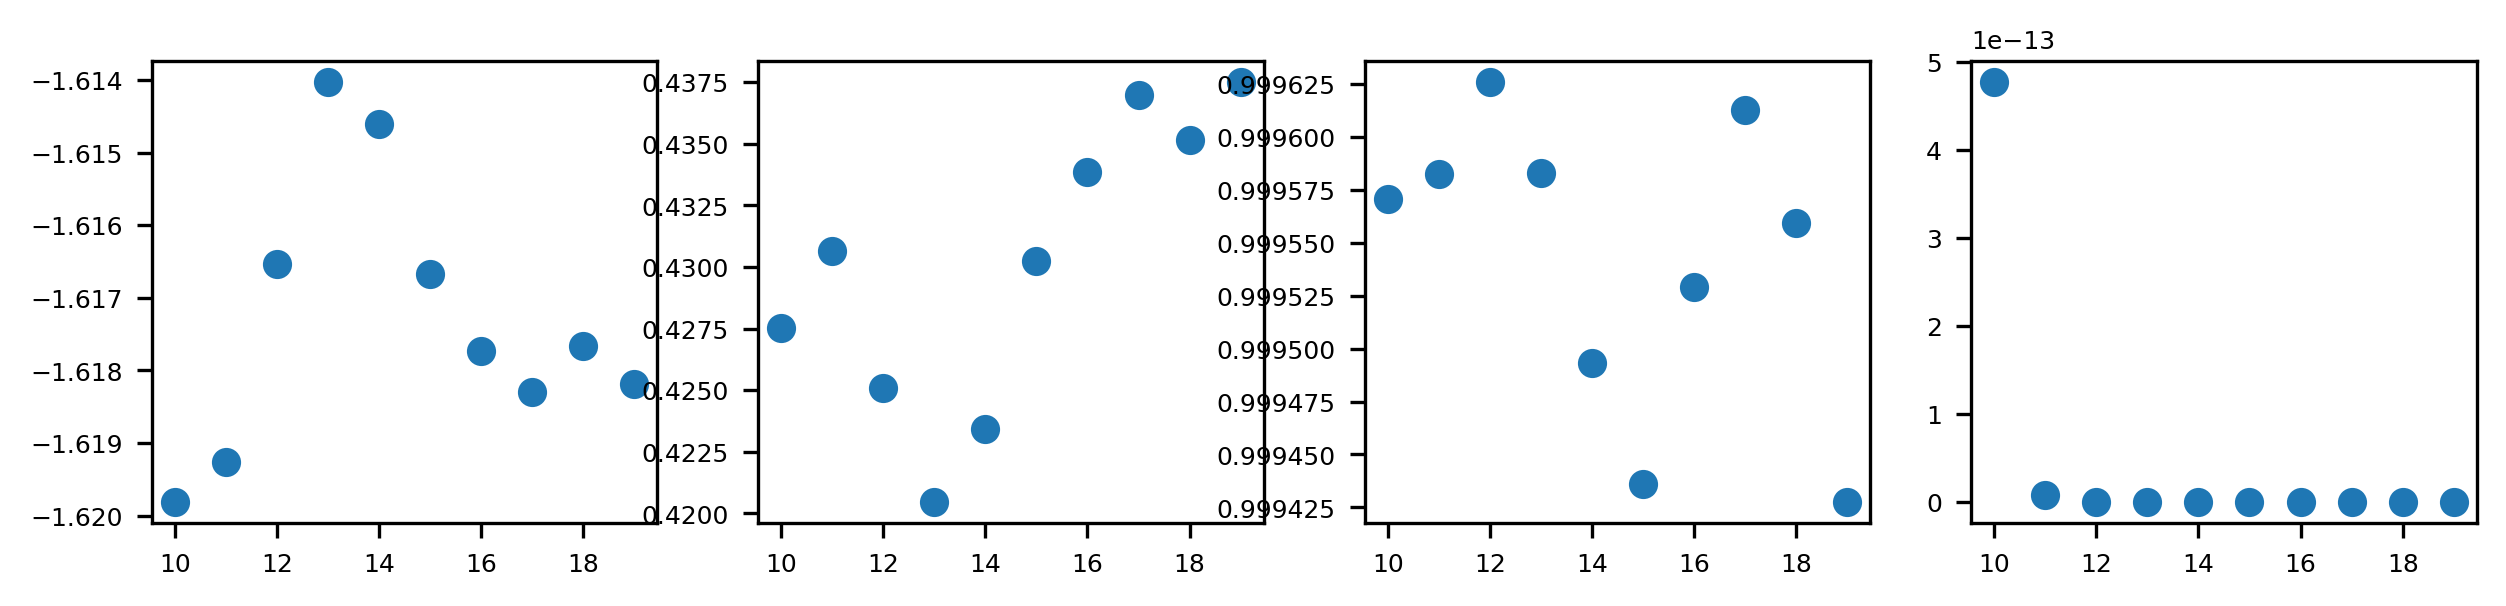

In [51]:
from scipy.stats import linregress

fit_dict = {
    'slope' : [],
    'intercept' : [],
    'r_value' : [],
    'p_value' : [],
}

def power_law_fit(x0, num_bins):

    bins = np.logspace(1, 6, num_bins)


    counts, bin_edges = np.histogram(x0, bins=bins, density=True)

    x = np.log10(np.sqrt(bin_edges[1:] * bin_edges[:-1]))
    y = np.log10(counts)


    fit_result = linregress(x, y)

    return fit_result

#ice_areas = areas[(area_labels == 3)|(area_labels == 4)]


ice_areas = ds['segment_size'].values
#ice_areas = areas

num_bin_range = np.arange(10, 20, 1)

for num_bins in num_bin_range:

    fit_result = power_law_fit(ice_areas, num_bins)

    fit_dict['slope'].append(fit_result.slope)
    fit_dict['intercept'].append(fit_result.intercept)
    fit_dict['r_value'].append(fit_result.rvalue)
    fit_dict['p_value'].append(fit_result.pvalue)



fig, ax = plt.subplots(1, 4, figsize=(10, 2), sharex=True)

ax[0].scatter(num_bin_range, fit_dict['slope'], label='slope')
ax[1].scatter(num_bin_range, fit_dict['intercept'], label='intercept')
ax[2].scatter(num_bin_range, np.array(fit_dict['r_value'])**2, label='r_value')
ax[3].scatter(num_bin_range, fit_dict['p_value'], label='p_value')


/tmp/ipykernel_100556/2748479602.py:24: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(counts)


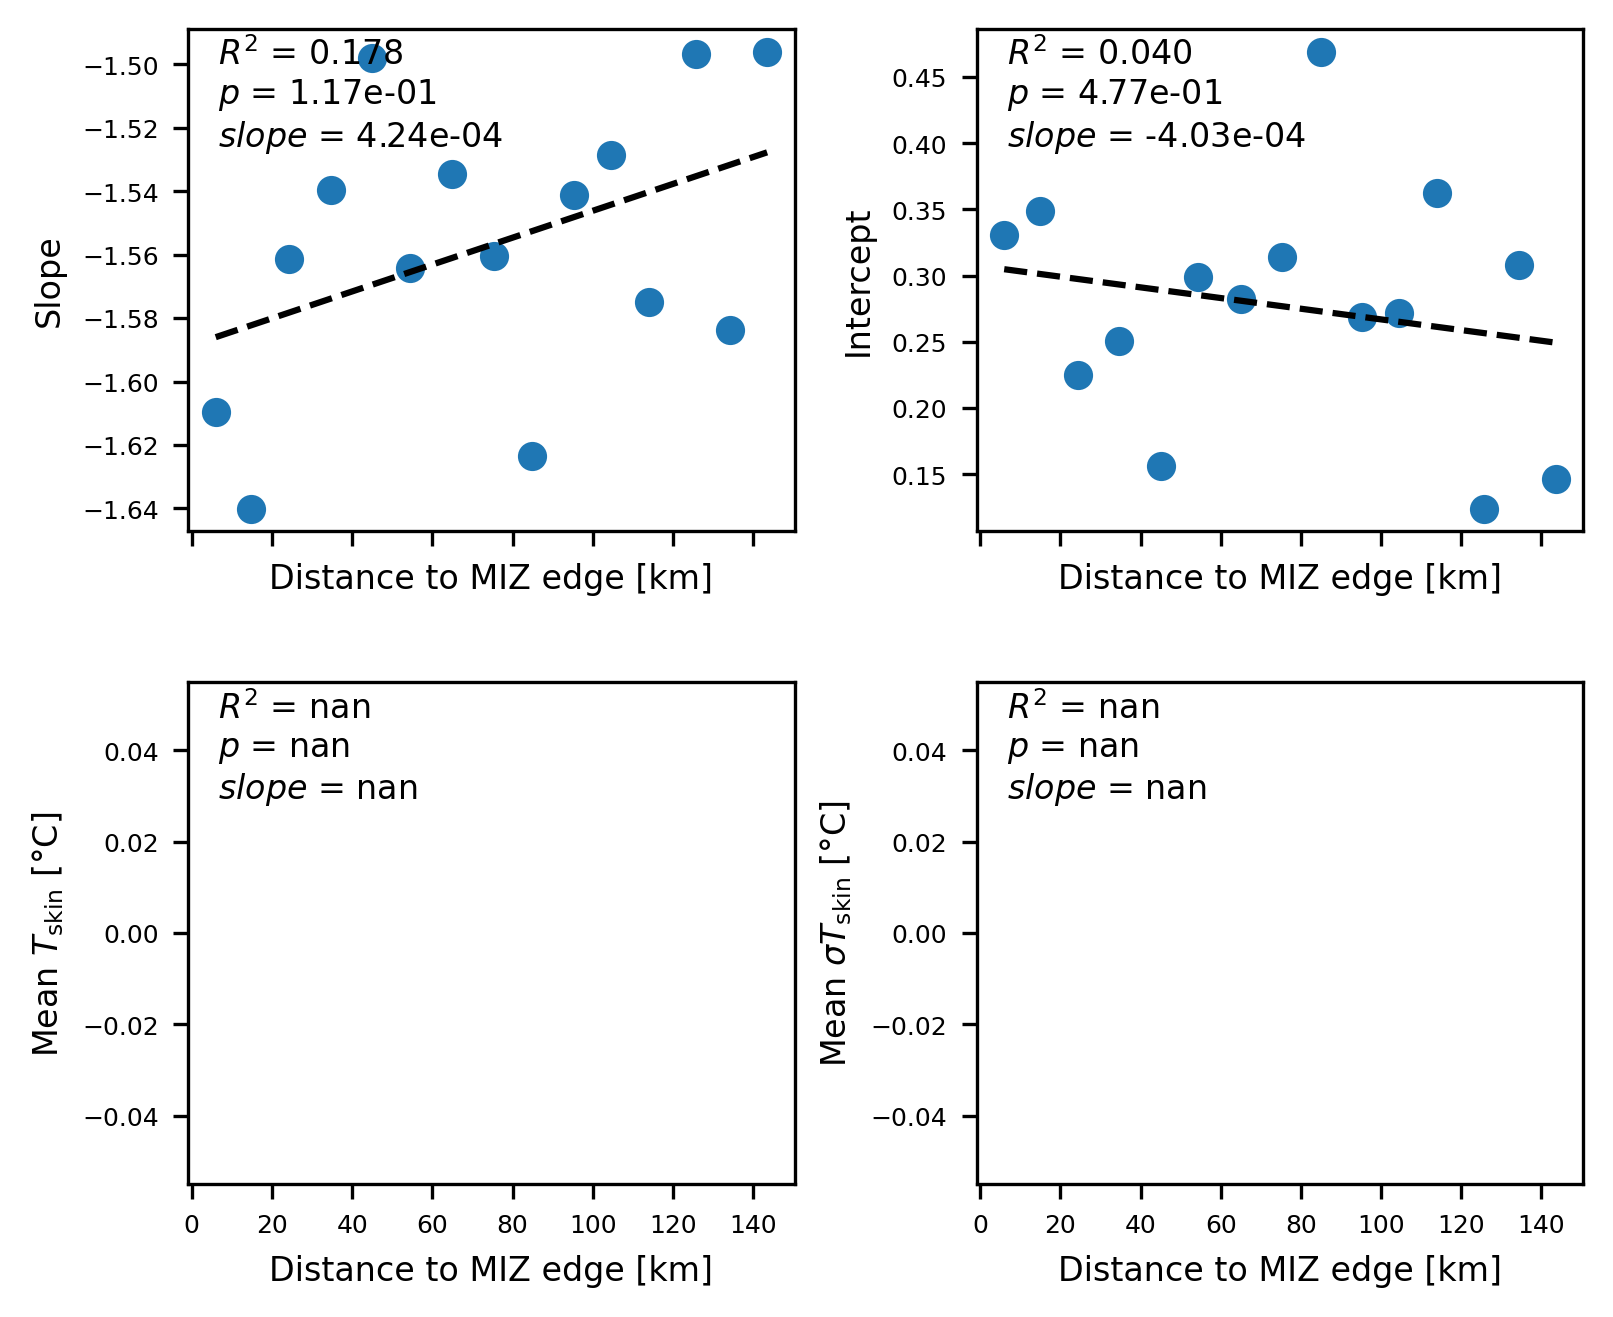

In [52]:
bin_number = 16
ds_gbed = ds.isel(segment=(ds.segment_label.values==4)).groupby_bins('segment_edge_dist', bins=np.linspace(0, 150, bin_number))


def fit_and_plot(x, y, ax, c=None, label=None):
    fit_result = linregress(x, y)
    color = 'darkred' if c is None else c
    ax.scatter(x, y, c=c, label=label)
    xx = np.linspace(min(x), max(x), 100)
    ax.plot(xx, fit_result.slope * xx + fit_result.intercept, color='black', linestyle='--')
    ax.text(.05, .75, f'$R^2$ = {fit_result.rvalue**2:.3f}\n$p$ = {fit_result.pvalue:.2e}\n$slope$ = {fit_result.slope:.2e}', transform=ax.transAxes, fontsize=8, va='bottom')                 


def power_law_fit(x0, num_bins):
    num_bins = 15
    x0min = 1
    x0max = 7
    #x0min = np.log(np.min(x0))
    #x0max = np.log(np.max(x0))
    bins = np.logspace(x0min, x0max, num_bins)
    counts, bin_edges = np.histogram(x0, bins=bins, density=True)

    x = np.log10(np.sqrt(bin_edges[1:] * bin_edges[:-1]))
    y = np.log10(counts)

    inf_mask = np.isinf(y)
    x = x[~inf_mask]
    y = y[~inf_mask]

    N = len(x)
    fit_result = linregress(x, y)

    return fit_result, N

### iterate over the groups and get the size distribution
fit_dict = {
    'slope' : [],
    'intercept' : [],
    'r_value' : [],
    'p_value' : [],
    'edge_dist' : [],
    'N' : [],
    'T' : [],
    'SIC' : [],
    'STD' : [],
    'slope_err' : [],
}

results = []

def area_weighted_mean(x, w):

    return np.sum(x * w) / np.sum(w)




for i, group in ds_gbed:

    edge_dist = group['segment_edge_dist'].values.mean()
    ice_areas = group['segment_size'].values
    area_labels = group['segment_label'].values
    sic = group['segment_sic'].values

    ice_area = ice_areas[(area_labels == 3)|(area_labels == 4)]

    fit_result, n = power_law_fit(ice_areas, bin_number)

    fit_dict['slope'].append(fit_result.slope)
    fit_dict['intercept'].append(fit_result.intercept)
    fit_dict['r_value'].append(fit_result.rvalue**2)
    fit_dict['p_value'].append(fit_result.pvalue)
    fit_dict['edge_dist'].append(edge_dist)
    fit_dict['N'].append(n)

    awm_T = area_weighted_mean(group['segment_T'].values, ice_areas)
    awm_SIC = area_weighted_mean(group['segment_sic'].values, ice_areas)
    awm_STD = area_weighted_mean(group['segment_std'].values, ice_areas)

    fit_dict['T'].append(awm_T)
    fit_dict['SIC'].append(awm_SIC)
    fit_dict['STD'].append(awm_STD)

    # fit_dict['T'].append(group['segment_T'].mean().values)
    # fit_dict['SIC'].append(group['segment_sic'].mean().values)
    # fit_dict['STD'].append(group['segment_std'].mean().values)
    fit_dict['slope_err'].append(fit_result.stderr)


### now let'S see if there's a scaling in miz dependce of the slope 


fig, ax = plt.subplots(2, 2, figsize=(6, 5), 
                       sharex=True, sharey=False,
                       gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

fit_and_plot(fit_dict['edge_dist'], fit_dict['slope'], ax[0,0], label='slope')
fit_and_plot(fit_dict['edge_dist'], fit_dict['intercept'], ax[0,1],label='intercept')
fit_and_plot(fit_dict['edge_dist'], fit_dict['T'], ax[1,0])
fit_and_plot(fit_dict['edge_dist'], fit_dict['STD'], ax[1,1])


ax[0,0].set_xlabel(r'Distance to MIZ edge [km]')
ax[0,0].set_ylabel(r'Slope')
ax[0,1].set_xlabel(r'Distance to MIZ edge [km]')
ax[0,1].set_ylabel(r'Intercept')
ax[1,0].set_xlabel(r'Distance to MIZ edge [km]')
ax[1,0].set_ylabel(r'Mean $T_\mathrm{skin}$ [°C]')
ax[1,1].set_xlabel(r'Distance to MIZ edge [km]')
ax[1,1].set_ylabel(r'Mean $\sigma T_\mathrm{skin}$ [°C]')
plt.savefig('../../../plots/make_plots_all_vs_distance.png', dpi=300, bbox_inches='tight')


In [53]:
def area_weighted_mean(x, w):

    return np.nansum(x * w) / np.nansum(w)

### calc the area weighted mean of T

awm = area_weighted_mean(ds['segment_T'].values, ds['segment_size'].values)
m = ds['segment_T'].mean().values

print(awm, m)   

-19.369912255932555 -8.740293


/tmp/ipykernel_100556/2338238678.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  im = ax.scatter(fit_dict['edge_dist'], fit_dict['slope'], c='grey', cmap='inferno', edgecolors='k', lw=.5 , vmin=-20, vmax=-5)


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)
nan


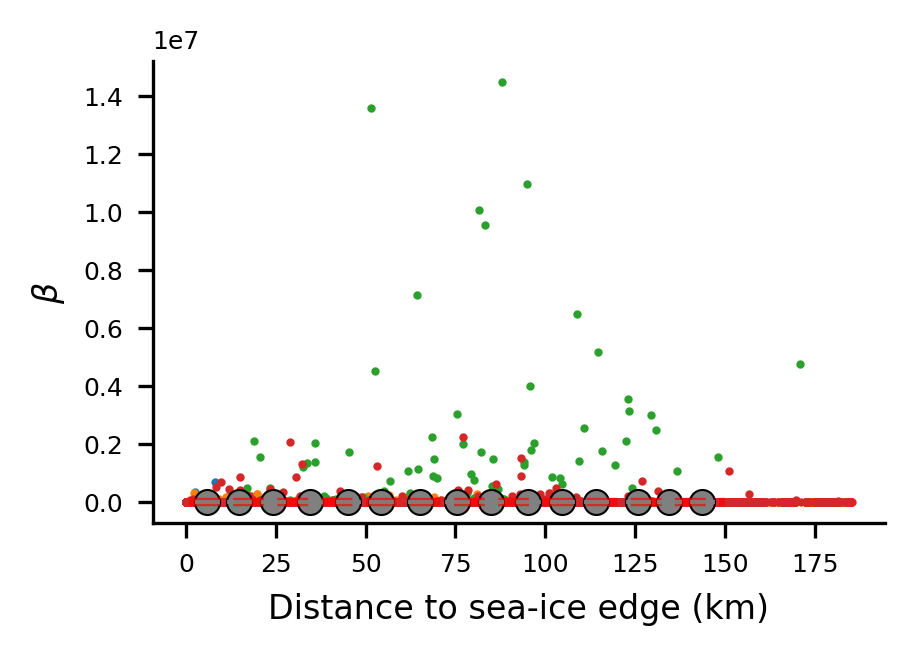

In [ ]:
import pandas as pd
df_fit_result = pd.DataFrame(fit_dict)

df_fit_result.corr()






fig, (ax) = plt.subplots(1, 1, figsize=(3.15, 2), sharex=True)


im = ax.scatter(fit_dict['edge_dist'], fit_dict['slope'], c='grey', cmap='inferno', edgecolors='k', lw=.5 , vmin=-20, vmax=-5)
fit_res = linregress(fit_dict['edge_dist'], fit_dict['slope'])
xx = np.linspace(1, 150, 100)
ax.plot(xx, fit_res.slope * xx + fit_res.intercept, color='r', linestyle='--', label='linear fit', 
        lw=2, alpha=0.7)
#ax2.set_xlabel('Distance to ice edge (km)')
ax.set_ylabel(r'$\beta$')

y_err = ax.errorbar(fit_dict['edge_dist'], fit_dict['slope'], yerr=fit_dict['slope_err'], fmt='none', ecolor='grey', alpha=0.7, capsize=3, capthick=1)


r = fit_res.rvalue
p = fit_res.pvalue
slope = fit_res.slope

#ax.text(.05, .8, f'$R^2$ = {r**2:.3f}\n$p$ = {p:.2e}\n$slope$ = {slope:.2e}', transform=ax.transAxes, fontsize=8, va='bottom')

ax.spines[['top', 'right']].set_visible(False)

#ax2.scatter(fit_dict['edge_dist'], fit_dict['STD'], c='grey',  edgecolors='k', lw=.5 ,)
#ax2.set_ylabel(r'$\sigma\,T_\mathrm{skin}$ (K)')

fit_res = linregress(fit_dict['edge_dist'], fit_dict['STD'])
xx = np.linspace(1, 150, 100)##

#ax2.plot(xx, fit_res.slope * xx + fit_res.intercept, color='r', linestyle='-', label='y={:.2f}x+{:.2f}'.format(fit_res.slope, fit_res.intercept))

ax.set_xlabel('Distance to sea-ice edge (km)')

#plt.colorbar(im, label='Mean $T_\mathrm{skin}$ (°C)')
plt.savefig('../../../plots/make_plots_plot_slope_vs_edge_dist_v4_andre.png', dpi=300, bbox_inches='tight')

print(fit_res)
print(fit_res.rvalue**2)

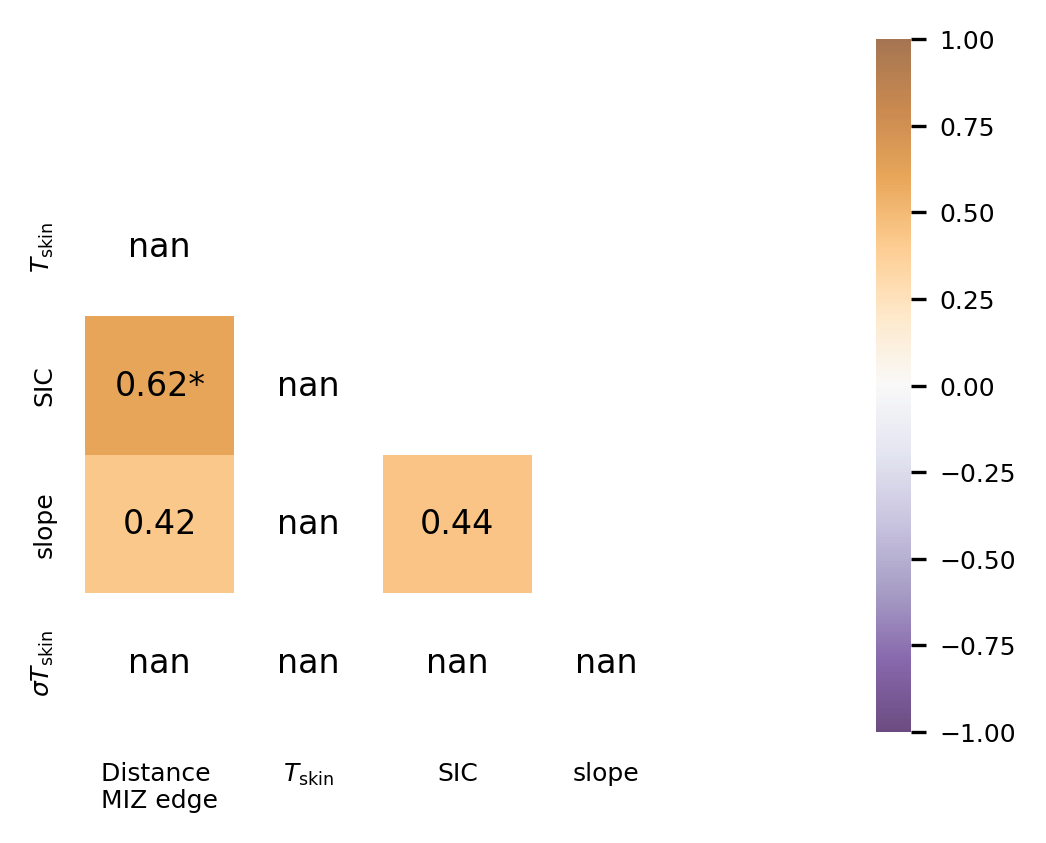

In [55]:
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

df_fit_result = pd.DataFrame(fit_dict)
df_corr = df_fit_result[['edge_dist', 'T', 'SIC', 'slope', 'STD']]
### subtract the upper triangle

rho = df_corr.corr()
pval = df_corr.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho_star = rho.round(2).astype(str) + p

mask = np.triu(np.ones_like(rho, dtype=bool))

rho_star.mask(mask)
rho_star.values[mask] = ''
rho_star = rho_star.to_numpy()
im = sns.heatmap(rho, mask=mask, cmap='PuOr_r', vmin=-1, vmax=1, annot=False, alpha=0.7, ax=ax)

for i in range(rho_star.shape[0]):
    for j in range(rho_star.shape[1]):
        im.text(j+.5, i+.5, rho_star[i,j], ha='center', va='center', color='black', fontsize=8)

ax.set_xticklabels(['Distance \nMIZ edge', 
                     r'$T_\mathrm{skin}$',
                    'SIC', r'slope', 
                    ''])


ax.set_yticklabels(['', 
                     r'$T_\mathrm{skin}$',
                    'SIC', r'slope', 
                    r'$\sigma T_\mathrm{skin}$'])

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.savefig('../../../plots/make_plots_corr_heatmap.png', dpi=300, bbox_inches='tight')

total area 21206.841 km²


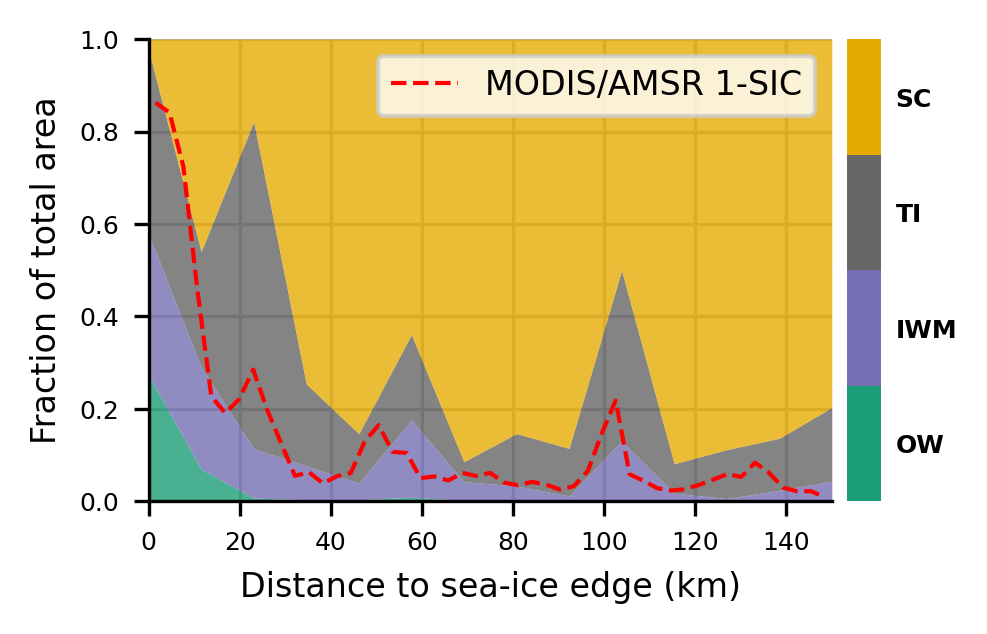

In [56]:
total_area = ds.segment_size.sum()

print('total area', total_area.values/1e4 ,'km²')

spacing = 15

dsgp_edge_dist = ds.groupby_bins('segment_edge_dist', np.linspace(0, 150, spacing))
dsgp_label = ds.groupby('segment_label').sum()

df = pd.DataFrame(
    columns=['Open Water', 'Snow Covered Ice', 'Thin Ice', 'Ice Water Mix'],
    data = np.zeros((spacing-1, 4)),

    #index=np.linspace(0, 200, 20)
)



df = df[['Open Water', 'Ice Water Mix', 'Thin Ice', 'Snow Covered Ice']]

#dsgp_edge_dist.segment_size.where(dsgp_edge_dist.segment_label == 2)

for i, group in enumerate(dsgp_edge_dist):
    open_water_area = group[1].segment_size.where(group[1].segment_label == 1).sum().values
    snow_covered_ice_area = group[1].segment_size.where(group[1].segment_label == 3).sum().values
    thin_ice_area = group[1].segment_size.where(group[1].segment_label == 4).sum().values
    ice_water_mix_area = group[1].segment_size.where(group[1].segment_label == 2).sum().values

    total_area = open_water_area + snow_covered_ice_area + thin_ice_area + ice_water_mix_area

    df.loc[i, 'Open Water'] = open_water_area / total_area
    df.loc[i, 'Snow Covered Ice'] = snow_covered_ice_area / total_area
    df.loc[i, 'Thin Ice'] = thin_ice_area / total_area
    df.loc[i, 'Ice Water Mix'] = ice_water_mix_area / total_area

df.set_index(np.linspace(0, 150, spacing-1), inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(3.15, 2))

im = df.plot.area(stacked=True, cmap=cmap, ax=ax, alpha=.8, legend=False, linewidth=0, label='')


#ax.legend(title='Surface type', loc='upper right', fontsize=6)
### add a colorbar instead of a legend

### make a colormap from listedcolors 

# from matplotlib.colors import ListedColormap

# cmap = ListedColormap(colors)


im = ax.contourf(np.array([[1, 2, 3, 4], [1, 2, 0, 4]]), cmap=cmap, alpha=1, levels=[0.5, 1.5, 2.5, 3.5, 4.5])
im.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[1, 2, 3, 4])
cbar.set_ticklabels(['OW', 'IWM', 'TI', 'SC'], fontweight='bold')
cbar.ax.yaxis.set_tick_params(width=0, length=0)
cbar.ax.yaxis.set_ticks_position('none')
cbar.ax.set_frame_on(False)
### shift the colorbar to the right

ax.axes.grid(True)
imi = (1 - ds.groupby_bins('segment_edge_dist', np.linspace(0, 150, 50)).mean().segment_sic / 100).plot(ax=ax, color='r', linestyle='--', linewidth=1, zorder=100)

label = ['MODIS/AMSR 1-SIC']
handles = imi

ax.legend(handles, label, loc='upper right', fontsize=8)

ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Distance to sea-ice edge (km)')
# ax.text(-0.1, -0.35, '    Ice edge\n   (SIC = 10%)\n  ← Open Ocean', transform=ax.transAxes, fontweight='bold', fontsize=8)
# #ax.text(-0.27, -0.2, '← Open Ocean\n', transform=ax.transAxes, fontweight='bold', fontsize=6)
# #ax.text(0.8, -0.2, '→\n', transform=ax.transAxes, fontweight='bold', fontsize=6)
# ax.text(.9, -0.35 , 'Internal  →\nice zone \n', transform=ax.transAxes, fontweight='bold', fontsize=8)
ax.set_ylabel('Fraction of total area')
ax.axes.grid(True)
ax.set_xlim([0, 150])
ax.set_ylim([0, 1])

plt.savefig('../../../plots/make_plots_stacked_bar_plot_with_SIC_andre_v4.png', bbox_inches='tight', dpi=300)


<>:135: SyntaxWarning: invalid escape sequence '\m'
<>:135: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_100556/2919598414.py:135: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$T_\mathrm{S}$ (°C)')


total area 21206.841 km²
0.722441176615995
-1.80 ± 2.55
-10.94 ± 0.99
-14.84 ± 2.47
-20.21 ± 1.50


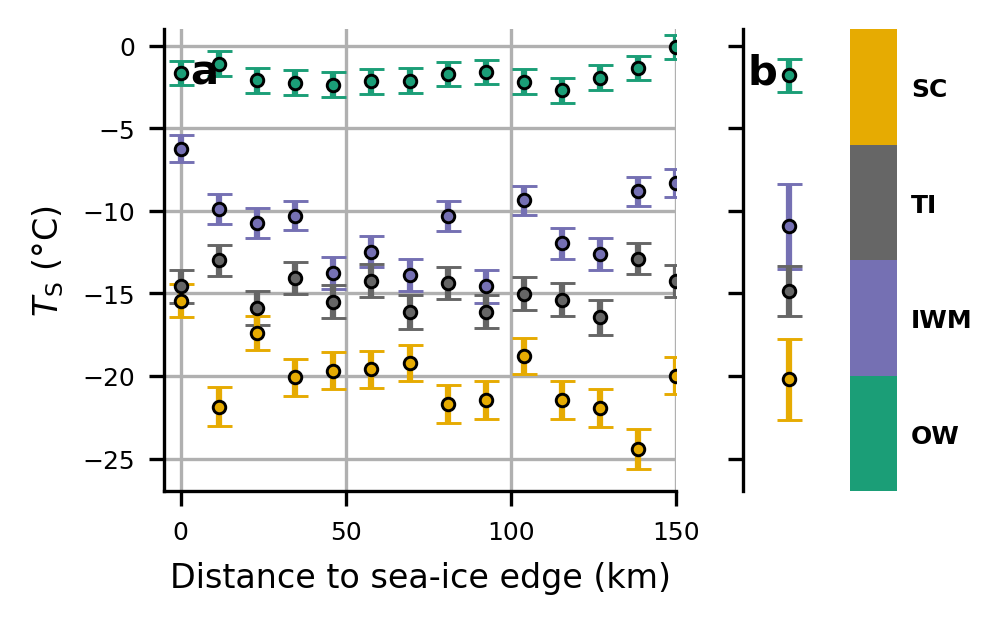

In [57]:
total_area = ds.segment_size.sum()

print('total area', total_area.values/1e4 ,'km²')

spacing = 15

dsgp_edge_dist = ds.groupby_bins('segment_edge_dist', np.linspace(0, 150, spacing))
dsgp_label = ds.groupby('segment_label').sum()

df = pd.DataFrame(
    columns=['Open Water', 'Snow Covered Ice', 'Thin Ice', 'Ice Water Mix'],
    data = np.zeros((spacing-1, 4)),
    #index=np.linspace(0, 200, 20)
)

def error_func(T):
    if T < 100:
        T += 273.15

    e_atm_sca = 0.477
    a_scs = 9.051  # K
    b_scs = 0.967  # K^-1
    e_atm_sca = 0.47  # K
    NETD_B5 = 0.473  # K
    a_b5 = 8.781  # K
    b_b5 = -0.031  # K^-1
    delta_T_B5 = (b_b5 * T + a_b5)
    delta_T_S_sca = np.sqrt(e_atm_sca**2 + b_scs**2 * NETD_B5**2 + (b_scs * delta_T_B5)**2)
    
    return delta_T_S_sca


df_error = pd.DataFrame(
    columns=['Open Water', 'Snow Covered Ice', 'Thin Ice', 'Ice Water Mix'],
    data = np.zeros((spacing-1, 4)),
)


df = df[['Open Water', 'Ice Water Mix', 'Thin Ice', 'Snow Covered Ice']]

#dsgp_edge_dist.segment_size.where(dsgp_edge_dist.segment_label == 2)

for i, group in enumerate(dsgp_edge_dist):
    open_water_mean = group[1].segment_T.where(group[1].segment_label == 1).values
    snow_covered_ice_mean = group[1].segment_T.where(group[1].segment_label == 3).values
    thin_ice_mean = group[1].segment_T.where(group[1].segment_label == 4).values
    ice_water_mix_mean = group[1].segment_T.where(group[1].segment_label == 2).values

    open_water_area = group[1].segment_size.where(group[1].segment_label == 1).values
    snow_covered_ice_area = group[1].segment_size.where(group[1].segment_label == 3).values
    thin_ice_area = group[1].segment_size.where(group[1].segment_label == 4).values
    ice_water_mix_area = group[1].segment_size.where(group[1].segment_label == 2).values


    open_water_mean = np.nansum(open_water_mean * open_water_area) / np.nansum(open_water_area)
    snow_covered_ice_mean = np.nansum(snow_covered_ice_mean * snow_covered_ice_area) / np.nansum(snow_covered_ice_area)
    thin_ice_area = np.nansum(thin_ice_mean * thin_ice_area) / np.nansum(thin_ice_area)
    ice_water_mix_area = np.nansum(ice_water_mix_mean * ice_water_mix_area) / np.nansum(ice_water_mix_area)


    total_area = 1
    df.loc[i, 'Open Water'] = open_water_mean / total_area
    df.loc[i, 'Snow Covered Ice'] = snow_covered_ice_mean / total_area
    df.loc[i, 'Thin Ice'] = thin_ice_area / total_area
    df.loc[i, 'Ice Water Mix'] = ice_water_mix_area / total_area

    df_error.loc[i, 'Open Water'] = error_func(open_water_mean)
    df_error.loc[i, 'Snow Covered Ice'] = error_func(snow_covered_ice_mean)
    df_error.loc[i, 'Thin Ice'] = error_func(thin_ice_area)
    df_error.loc[i, 'Ice Water Mix'] = error_func(ice_water_mix_area)

df.set_index(np.linspace(0, 150, spacing-1), inplace=True)
df_error.set_index(np.linspace(0, 150, spacing-1), inplace=True)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(3.15, 2),
                               gridspec_kw={'width_ratios': [1, .3]},
                               sharey=True)

#im = df.plot(stacked=False, cmap=cmap, ax=ax, alpha=.8, legend=False, linewidth=0, label='')
im = df.plot(cmap=cmap, alpha=.8, legend=False, label='', marker='o', ax=ax, markersize=2, linewidth=0)

#ax.legend(title='Surface type', loc='upper right', fontsize=6)
### add a colorbar instead of a legend

### make a colormap from listedcolors 

# from matplotlib.colors import ListedColormap

# cmap = ListedColormap(colors)

means = df.mean()
means_label = [1, 2, 3, 4]

#ax2.scatter([0,0,0,0], means, c=means_label, cmap=cmap, edgecolors='k', lw=.5, s=50)
ax2.set_xticks([])
ax2.spines[['top', 'right', 'bottom']].set_visible(False)

im = ax.contourf(np.array([[1, 2, 3, 4], [1, 2, 0, 4]]), cmap=cmap, alpha=1, levels=[0.5, 1.5, 2.5, 3.5, 4.5])
im.set_visible(False)

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='50%', pad=0.05)

cbar = fig.colorbar(im, cax=cax, orientation='vertical', ticks=[1, 2, 3, 4])
cbar.set_ticklabels(['Open\nWater', 'Ice Water\nMix', 'Thin\nIce', 'Snow Covered\nIce'])
cbar.set_ticklabels(['OW', 'IWM', 'TI', 'SC'], fontweight='bold')
cbar.ax.yaxis.set_tick_params(width=0, length=0)
cbar.ax.yaxis.set_ticks_position('none')
cbar.ax.set_frame_on(False)

colors = np.array([[0.10588235, 0.61960784, 0.46666667, 1.],
                [0.45882353, 0.43921569, 0.70196078, 1.],
                [0.4       , 0.4       , 0.4       , 1.],
                [0.90196078, 0.67058824, 0.00784314, 1.],
])

print(error_func(273.15))   

ax.axes.grid(True)
# imi = (1 - ds.groupby_bins('segment_edge_dist', np.linspace(0, 150, 50)).mean().segment_sic / 100).plot(ax=ax, color='r', linestyle='--', linewidth=1, zorder=100)

# label = ['MODIS/AMSR 1-SIC']
# handles = imi

# ax.legend(handles, label, loc='upper right', fontsize=8)

ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('distance (km)')
# ax.text(-0.1, -0.35, '    Ice edge\n   (SIC = 10%)\n  ← Open Ocean', transform=ax.transAxes, fontweight='bold', fontsize=8)
# #ax.text(-0.27, -0.2, '← Open Ocean\n', transform=ax.transAxes, fontweight='bold', fontsize=6)
# #ax.text(0.8, -0.2, '→\n', transform=ax.transAxes, fontweight='bold', fontsize=6)
# ax.text(.9, -0.35 , 'Internal  →\nice zone \n', transform=ax.transAxes, fontweight='bold', fontsize=8)
ax.set_ylabel('$T_\mathrm{S}$ (°C)')
ax.axes.grid(True)
#ax.set_xlim([0, 150])
# ax.set_ylim([0, 1])
ax.set_xlabel('Distance to sea-ice edge (km)')


ax.text(0.05, 0.95, 'a', transform=ax.transAxes, fontsize=10, fontweight='bold', va='top')
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=10, fontweight='bold', va='top')


#### fill a sheded area with the error + - the mean 

total_error  = (df.std()**2 + df_error.mean()**2)**.5

for i, col in enumerate(df.columns):
    #ax.fill_between(df.index, df.loc[:, col] - df_error.loc[:, col], df.loc[:, col] + df_error.loc[:, col], alpha=.4, color=colors[i])

    ax.errorbar(df.index, df.loc[:, col], yerr=df_error.loc[:, col], fmt='o', color=colors[i], markersize=3, label=col, capsize=3, capthick=2, markeredgecolor='black', markeredgewidth=.7)
    ax2.errorbar([0], means[col], yerr=total_error[col], fmt='o', color=colors[i], markersize=3, label='Total error', capsize=3, capthick=2, markeredgecolor='black', markeredgewidth=.7)


ax.set_xlim([-5, 150])




plt.savefig('../../../plots/make_plots_stacked_bar_plot_temperature_errors_v5.png', bbox_inches='tight', dpi=300)



for m, e in zip(means, total_error):
    print(f'{m:.2f} ± {e:.2f}')


Label 1: Open Water
Label 2: Ice Water Mix
Label 3: Thin Ice
Label 4: Snow Covered


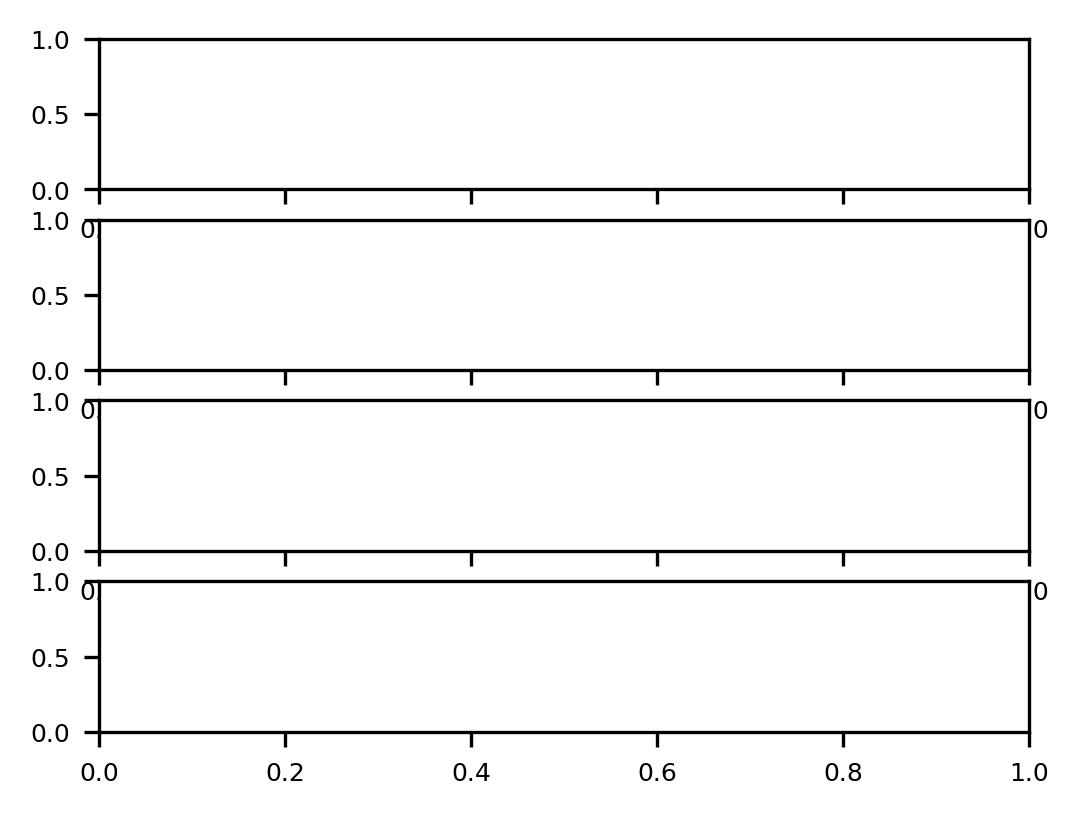

In [61]:
from scipy.stats import pearsonr

label_dict = {1: 'Open Water', 2: 'Ice Water Mix', 3: 'Thin Ice', 4: 'Snow Covered'}


fig, ax = plt.subplots(4, 1, figsize=(4, 3))


for label in [1, 2, 3, 4]:

    print(f'Label {label}: {label_dict[label]}')

    dsgp = ds.where(ds['segment_label'] == label).groupby_bins('segment_edge_dist', np.linspace(0, 350, 36)).mean()

    df = dsgp[['segment_edge_dist', 'segment_size', 'segment_T', 'segment_std']].to_pandas()



    # this computes the correlation coefficients
    corr = df.corr(method=lambda x, y: pearsonr(x, y)[0]) 

    # this computes the p-values
    pvalues = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(df.columns)) 


    # from scipy.stats import pearsonr
    # import numpy as np
    # rho = df.corr()
    # pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    # p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
    # rho = rho.round(2).astype(str) + p

    # mask = np.triu(np.ones_like(rho, dtype=bool))

    # rho.mask(mask)
    # rho.values[mask] = ''
    # print(rho)
    # print('')
    # print('---' *40)
    # print('')


In [59]:
ds_sic.time.size / 100

3819.91